# Tải các thư viện sử dụng

In [ ]:
# !pip install imblearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import joblib


# Chuẩn bị dữ liệu

In [83]:
# Đọc dữ liệu từ drive
df = pd.read_csv('/content/data.csv')

## Thông tin dữ liệu

Nguồn thu thập dữ liệu: https://www.kaggle.com/datasets/hemanthsai7/loandefault?select=train.csv

Các trường dữ liệu:

ID: Định danh duy nhất của đại diện

Loan Amount: Số tiền vay được đề xuất

Funded Amount: Số tiền vay được hỗ trợ

Funded Amount Investor: Số tiền vay được duyệt bởi nhà đầu tư

Term: Kỳ hạn của khoản vay (theo tháng)

Batch Enrolled: Các số lô cho các đại diện

Interest Rate: Lãi suất (%) trên khoản vay

Grade: Hạng của ngân hàng

Sub Grade: Hạng phụ của ngân hàng

Debt to Income: Tỷ lệ trả nợ hàng tháng tổng của đại diện chia cho thu nhập hàng tháng được báo cáo, ngoại trừ khoản tiền thế chấp

Delinquency - two years: Số ngày trễ hơn 30 ngày trong vòng 2 năm qua

Inquires - six months: Tổng số yêu cầu thông tin trong 6 tháng qua

Open Account: Số tài khoản tín dụng mở trong tài khoản tín dụng của đại diện

Public Record: Số hồ sơ công cộng có vấn đề

Revolving Balance: Tổng số dư tín dụng quay vòng

Revolving Utilities: Số tiền tín dụng mà đại diện đang sử dụng, liên quan đến revolving_balance

Total Accounts: Tổng số dòng tín dụng có sẵn trong dòng tín dụng của đại diện

Initial List Status: Trạng thái liệt kê duy nhất của khoản vay - W (Đang chờ), F (Chuyển tiếp)

Total Received Interest: Tổng số lãi nhận được đến nay

Total Received Late Fee: Tổng số phí trễ nhận được đến nay

Recoveries: Tái tạo thu nhập ròng sau khi tính thuế

Collection Recovery Fee: Phí thu hồi sau khi tính thuế thu hồi

Collection 12 months Medical: Tổng số thu hồi trong 12 tháng qua - không bao gồm các khoản thu hồi y tế

Application Type: Chỉ định khi đại diện là cá nhân hoặc đồng sở hữu

Last week Pay: Chỉ định bao lâu (theo tuần) mà đại diện đã thanh toán EMI sau khi lô được đăng ký

Accounts Delinquent: Số tài khoản mà đại diện đang nợ

Total Collection Amount: Tổng số tiền thu hồi từng nợ

Total Current Balance: Tổng số dư hiện tại từ tất cả các tài khoản

Total Revolving Credit Limit: Tổng hạn mức tín dụng quay vòng

Loan Status: 1 = Người nợ, 0 = Người không nợ

### Thống kê về các đặc trưng số

In [11]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


### Hiển thị thông tin tổng quan

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

# Làm sạch dữ liệu

In [59]:
df.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,...,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,BAT4808022,10.731432,C,C5,RENT,...,3.167937,0.553076,0,INDIVIDUAL,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,BAT2558388,13.993688,A,A5,OWN,...,0.098448,0.047589,0,INDIVIDUAL,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,BAT5341619,11.178457,G,C2,MORTGAGE,...,0.530214,0.216985,0,INDIVIDUAL,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,BAT2078974,5.520413,C,B5,RENT,...,2.912215,0.886864,0,INDIVIDUAL,9,0,35,71650,14871,0


In [84]:
df.drop(['Batch Enrolled','Revolving Utilities','Application Type'],axis=1,inplace=True)

In [86]:
df.rename({"Home Ownership":"Salary"},axis=1, inplace=True)

In [87]:
df.rename({"Employment Duration":"Home Ownership", "Total Current Balance":"Balance", "Loan Status":"Defaulted"},axis=1, inplace=True)


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Home Ownership                67463 non-null  object 
 9   Salary                        67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Payment Plan                  67463 non-null  object 
 12  Loan Title                    67463 non-null  object 
 13  D

Xoá các cột Null

In [64]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Salary                          0
Salary                          0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Last week Pay                   0
Accounts Delinquent             0
Total Collection Amount         0
Balance       

Gom nhóm Verification Status

In [89]:
df['Verification Status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [90]:
df.loc[df['Verification Status']=='Source Verified','Verification Status']= 'Verified'

In [91]:
df['Verification Status'].unique()

array(['Not Verified', 'Verified'], dtype=object)

In [68]:
df.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Salary,Salary,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted
0,65087372,10000,32236,12329.362860,59,11.135007,B,C4,MORTGAGE,176346.62670,...,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,12.237563,C,D3,RENT,39833.92100,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,12.545884,F,D4,MORTGAGE,91506.69105,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,16.731201,C,C3,MORTGAGE,108286.57590,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,15.008300,C,D4,MORTGAGE,44234.82545,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,17.246986,B,G5,RENT,98957.47561,...,0.088584,5.043575,0.581688,0,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,10.731432,C,C5,RENT,102391.82430,...,0.083528,3.167937,0.553076,0,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,13.993688,A,A5,OWN,61723.52014,...,0.044965,0.098448,0.047589,0,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,11.178457,G,C2,MORTGAGE,63205.09072,...,0.017106,0.530214,0.216985,0,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,5.520413,C,B5,RENT,42015.46586,...,0.008338,2.912215,0.886864,0,9,0,35,71650,14871,0


Làm tròn lãi suất

In [92]:
df['Interest Rate']=np.ceil(df['Interest Rate'])

In [93]:
def amount_map(amount):
    if amount<15000:
        return 'Small'
    if amount<25000:
        return 'Medium'
    else: return 'Big'

In [94]:
df['Loan Category']= df['Loan Amount'].map(amount_map)

In [72]:
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Salary,Salary,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted,Loan Category
0,65087372,10000,32236,12329.36286,59,12.0,B,C4,MORTGAGE,176346.62670,...,2.498291,0.793724,0,49,0,31,311301,6619,0,Small
1,1450153,3609,11940,12191.99692,59,13.0,C,D3,RENT,39833.92100,...,2.377215,0.974821,0,109,0,53,182610,20885,0,Small
2,1969101,28276,9311,21603.22455,59,13.0,F,D4,MORTGAGE,91506.69105,...,4.316277,1.020075,0,66,0,34,89801,26155,0,Big
3,6651430,11170,6954,17877.15585,59,17.0,C,C3,MORTGAGE,108286.57590,...,0.107020,0.749971,0,39,0,40,9189,60214,0,Small
4,14354669,16890,13226,13539.92667,59,16.0,C,D4,MORTGAGE,44234.82545,...,1294.818751,0.368953,0,18,0,430,126029,22579,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,10.0,C,A4,MORTGAGE,83961.15003,...,564.614852,0.865230,0,69,0,48,181775,34301,1,Small
67459,35182714,8323,11046,15637.46301,59,10.0,C,B3,RENT,65491.12817,...,2.015494,1.403368,0,14,0,37,22692,8714,0,Small
67460,16435904,15897,32921,12329.45775,59,20.0,A,F3,MORTGAGE,34813.96985,...,5.673092,1.607093,0,137,0,17,176857,42330,0,Medium
67461,5300325,16567,4975,21353.68465,59,14.0,D,E3,OWN,96938.83564,...,1.157454,0.207608,0,73,0,61,361339,39075,0,Medium


# Trực quan hoá dữ liệu

## Trực quan các dữ liệu Nhãn

<Axes: title={'center': 'Số lượng khách hàng bình thường/vỡ nợ'}, xlabel='Defaulted'>

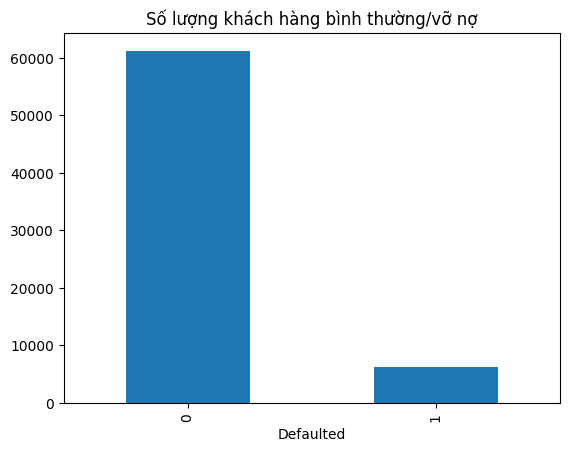

In [95]:
# Hiển thị số lượng khách hàng theo trạng thái của khoản vay
df['Defaulted'].value_counts().plot(kind = 'bar', title="Số lượng khách hàng bình thường/vỡ nợ")

## Trực quan các dữ liệu dạng numerical

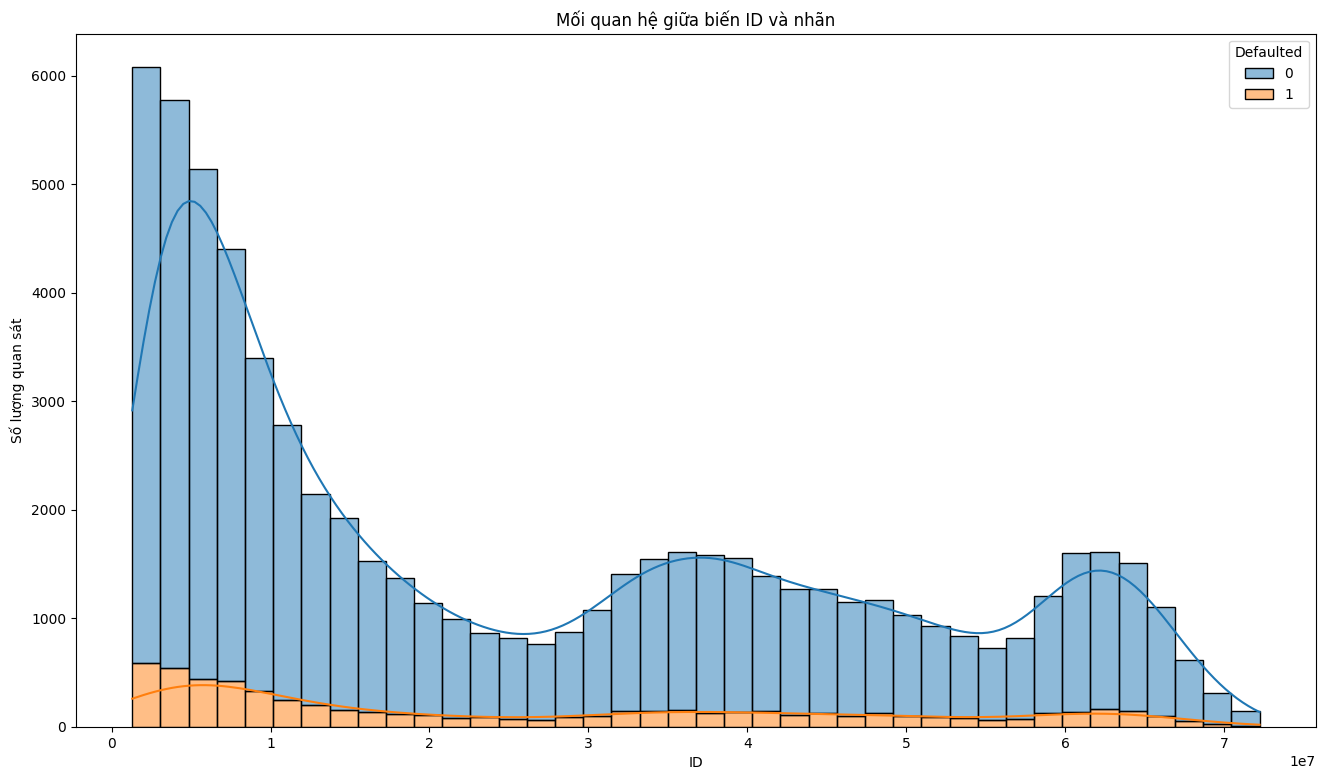

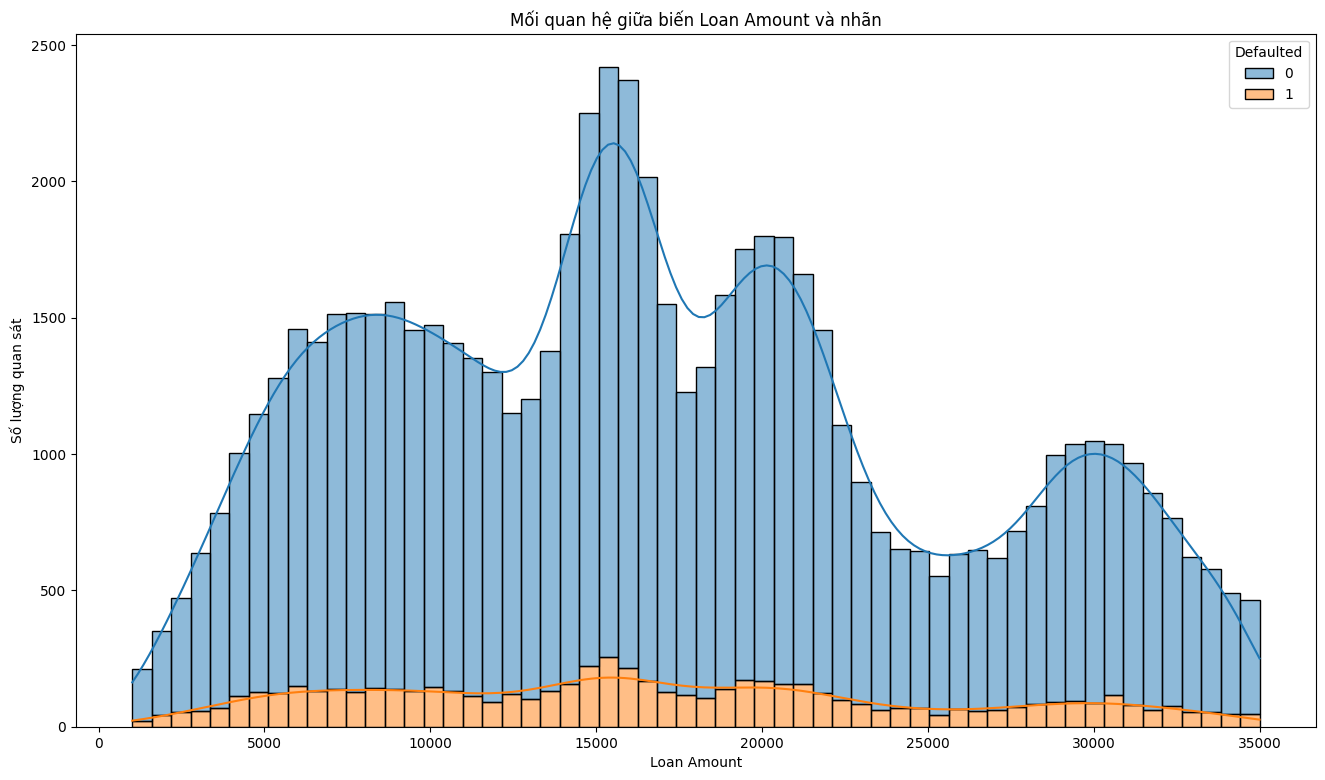

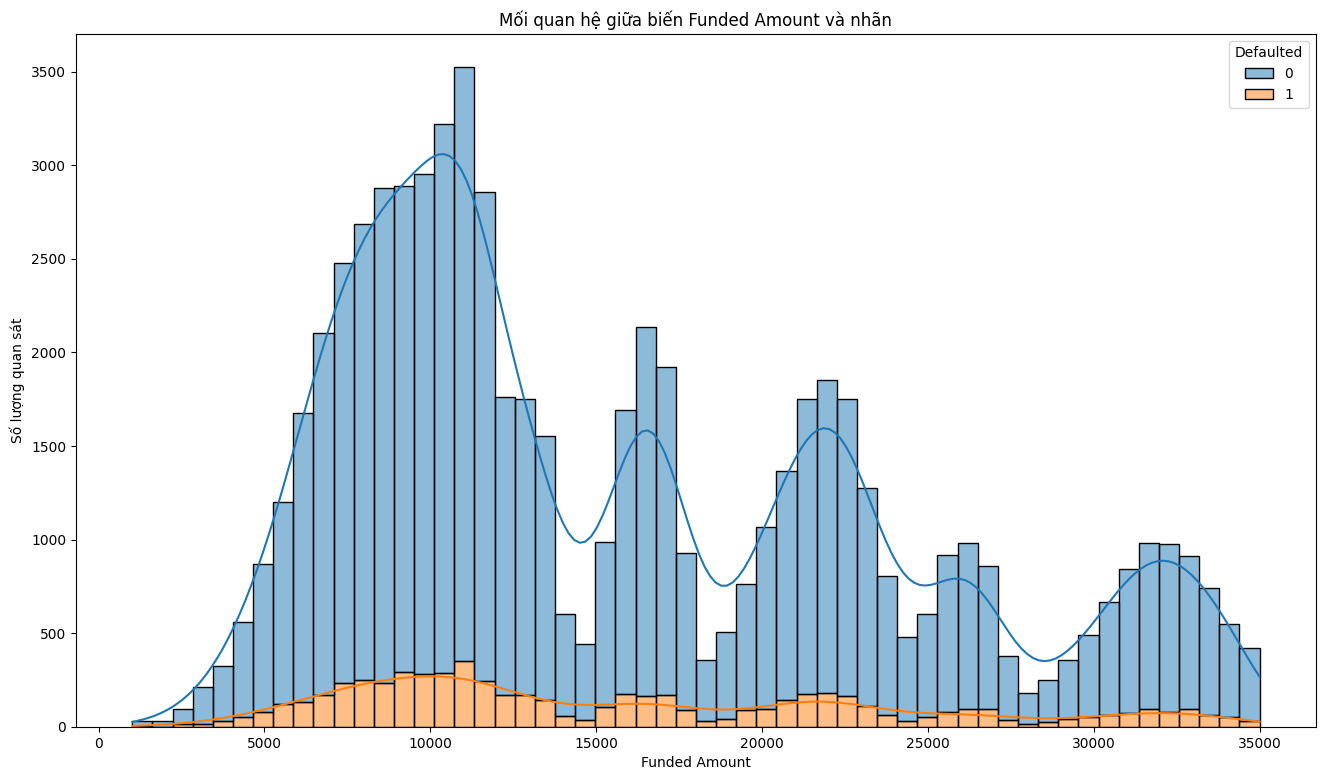

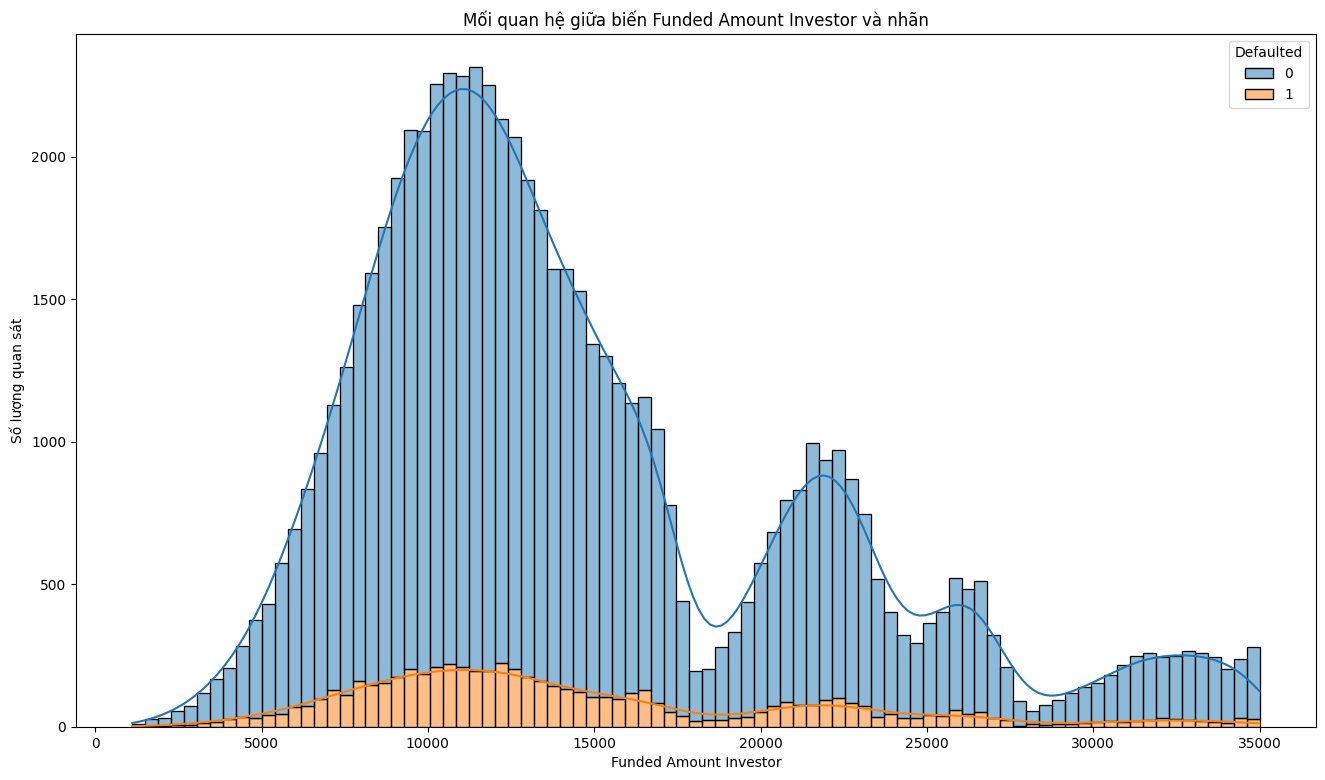

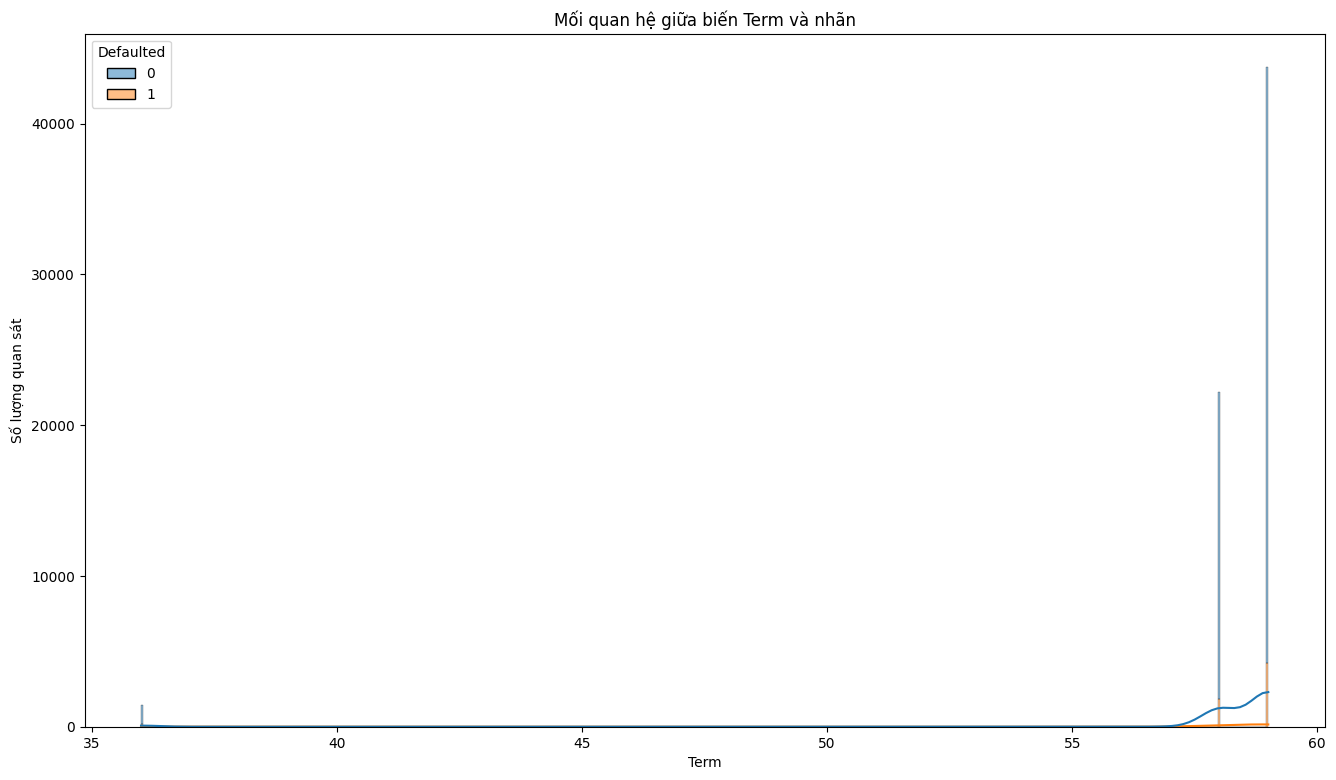

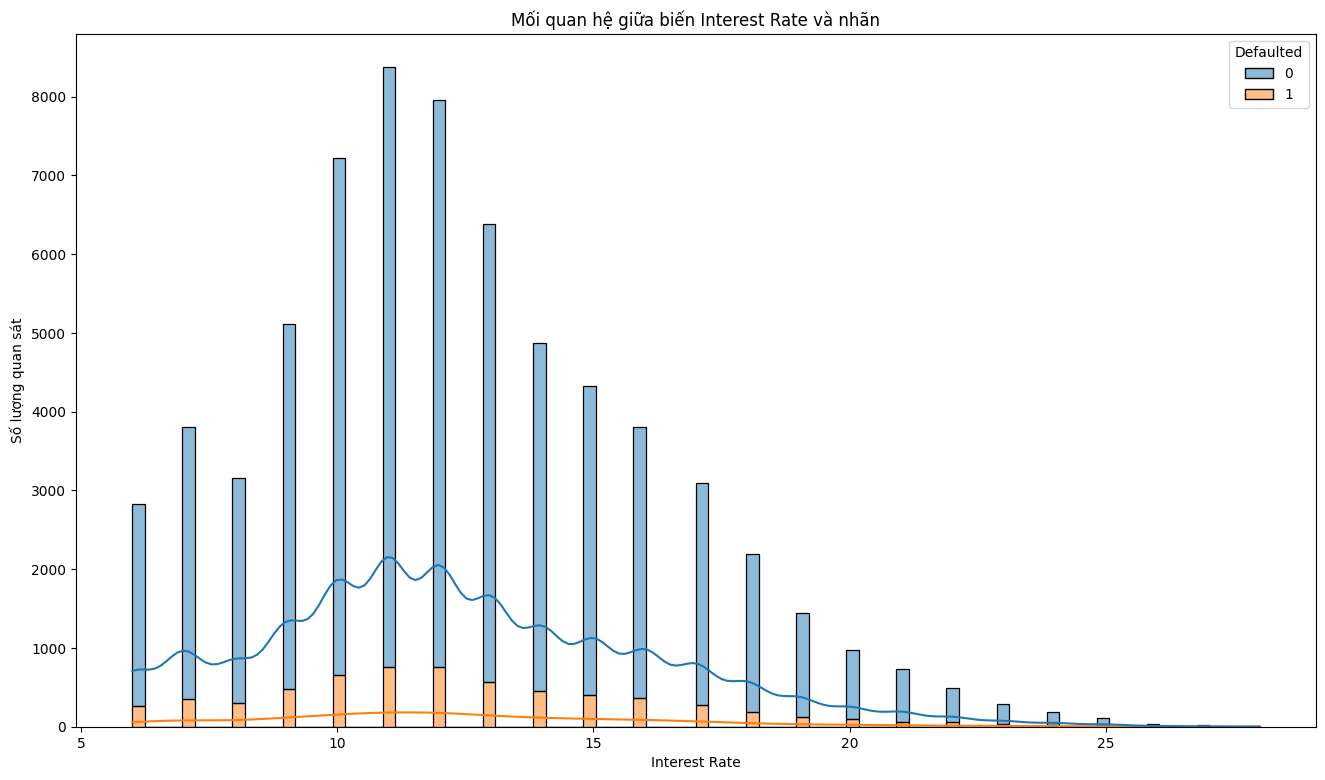

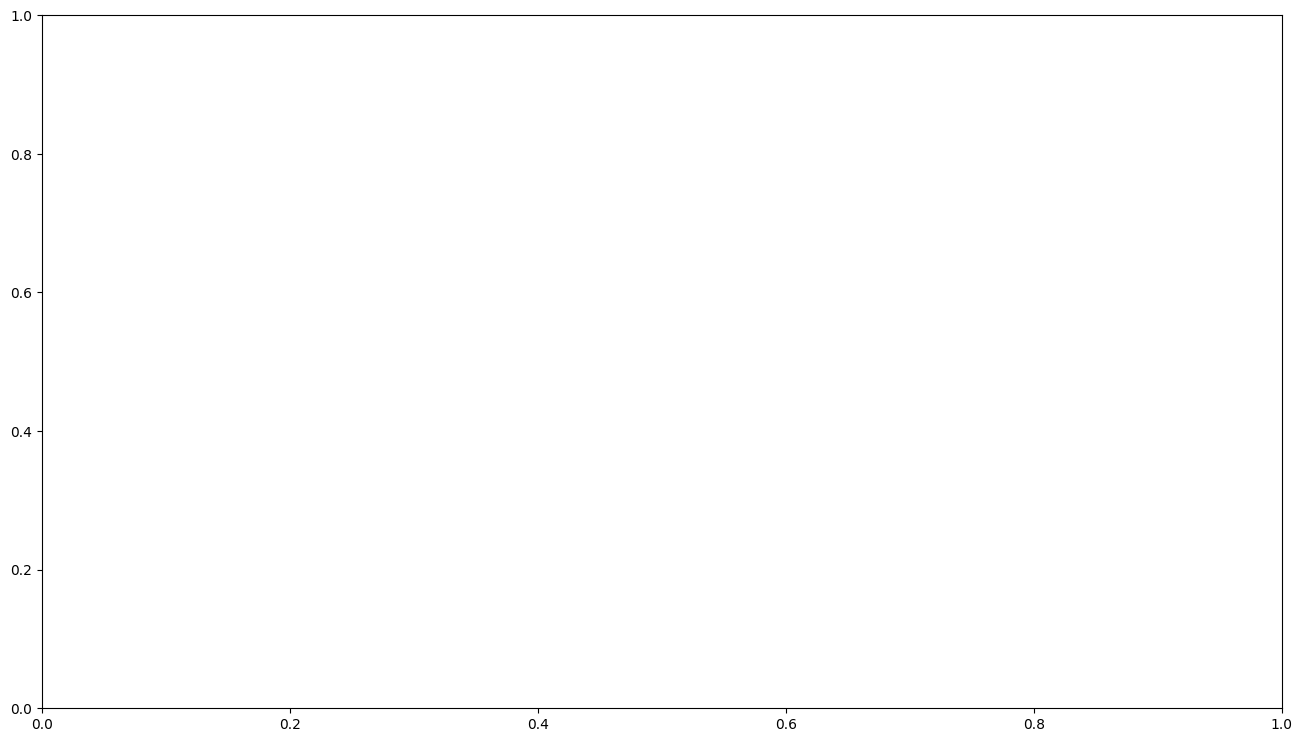

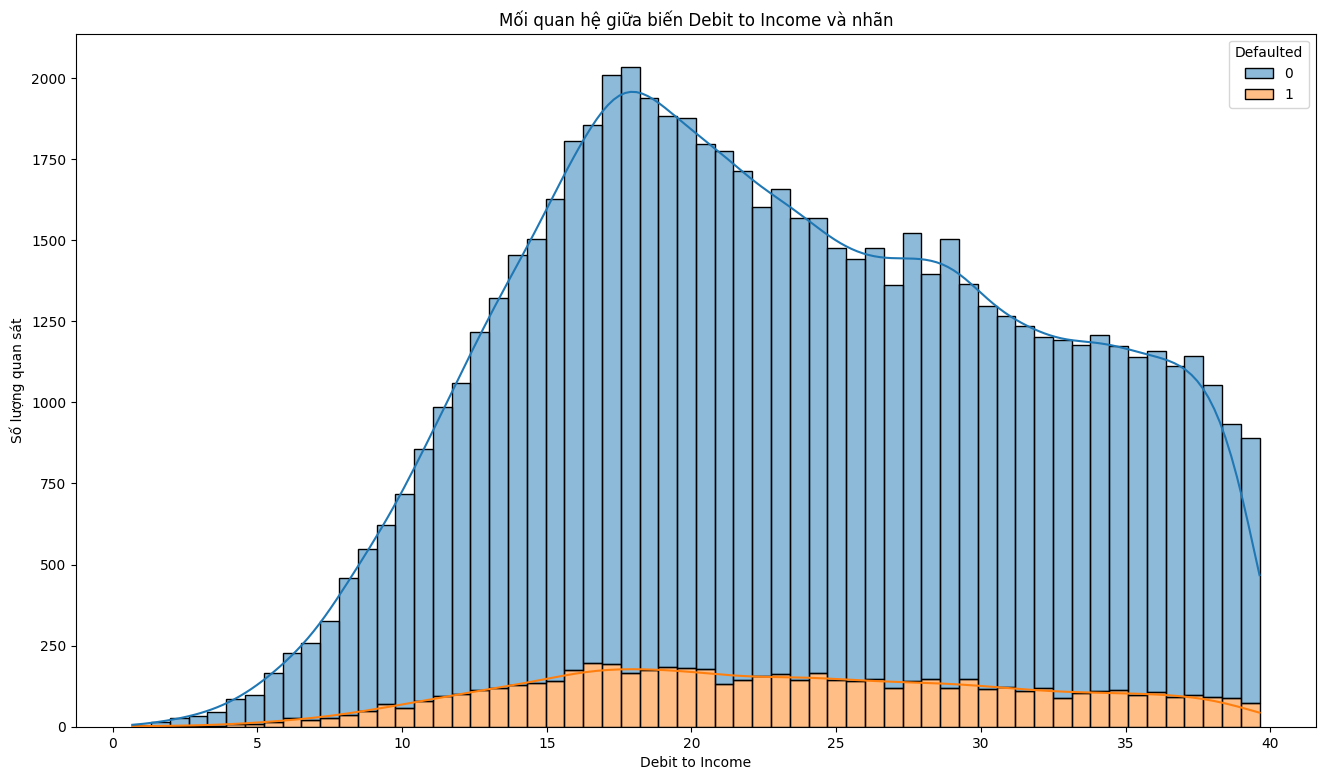

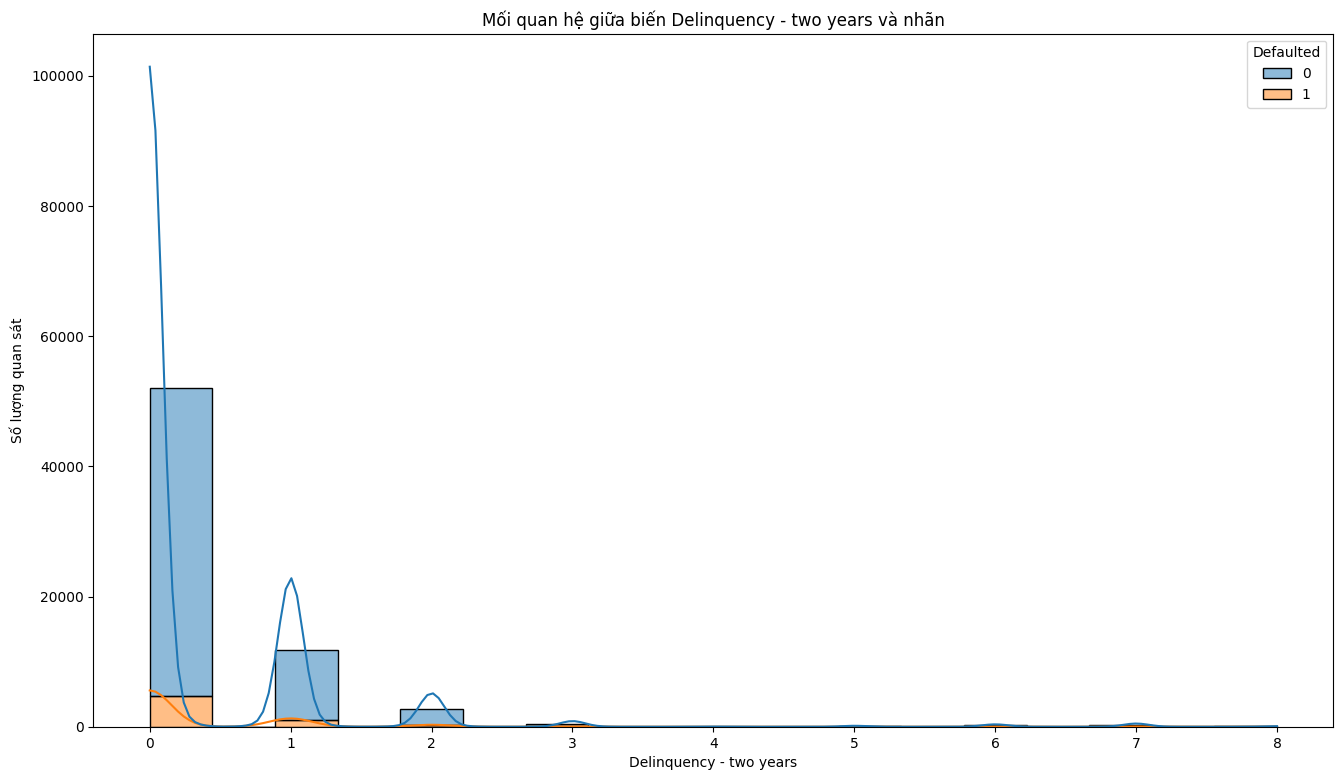

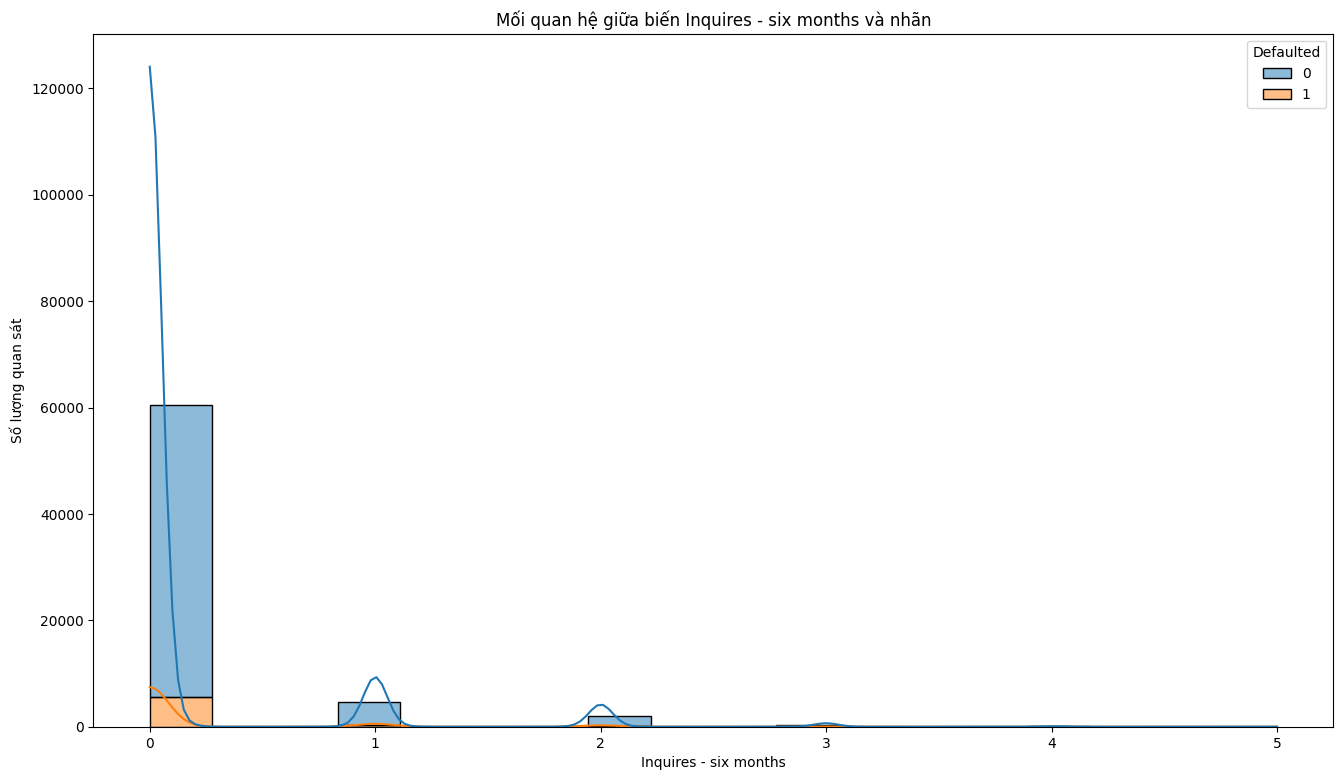

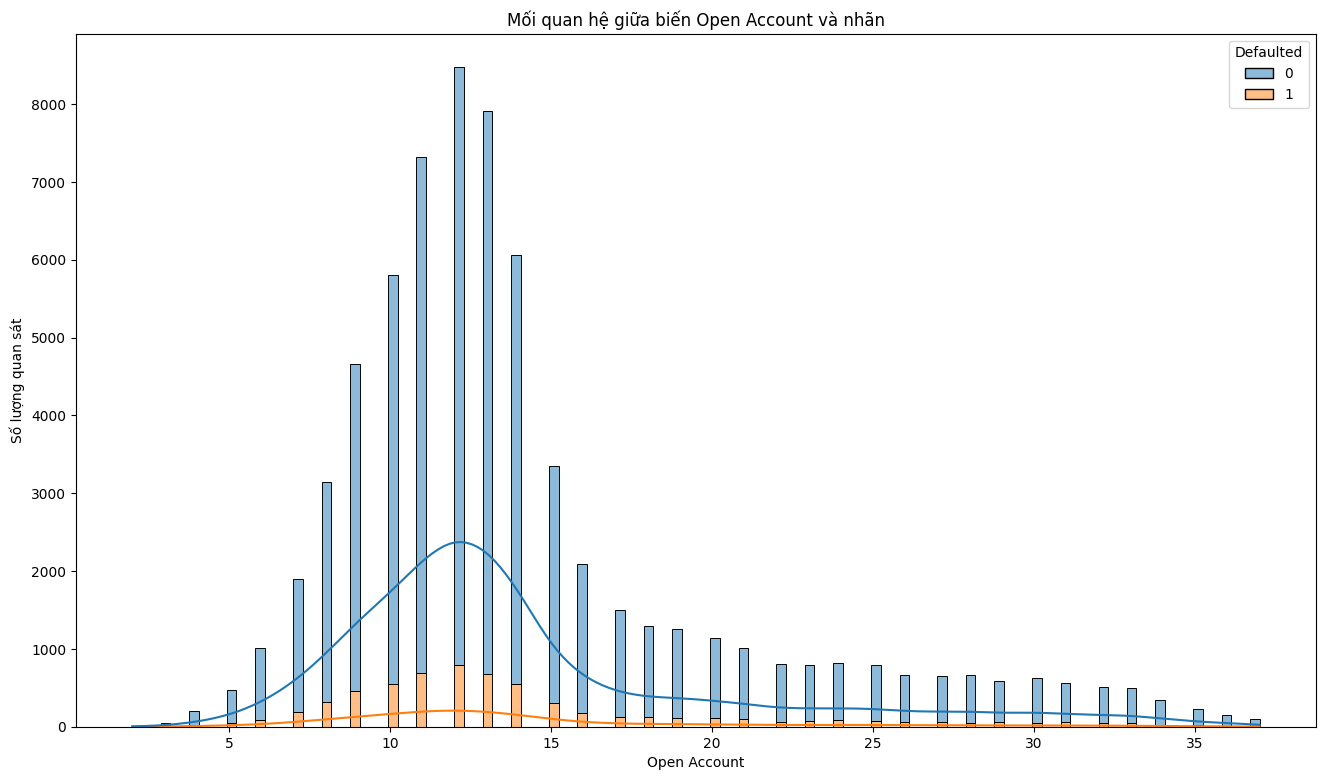

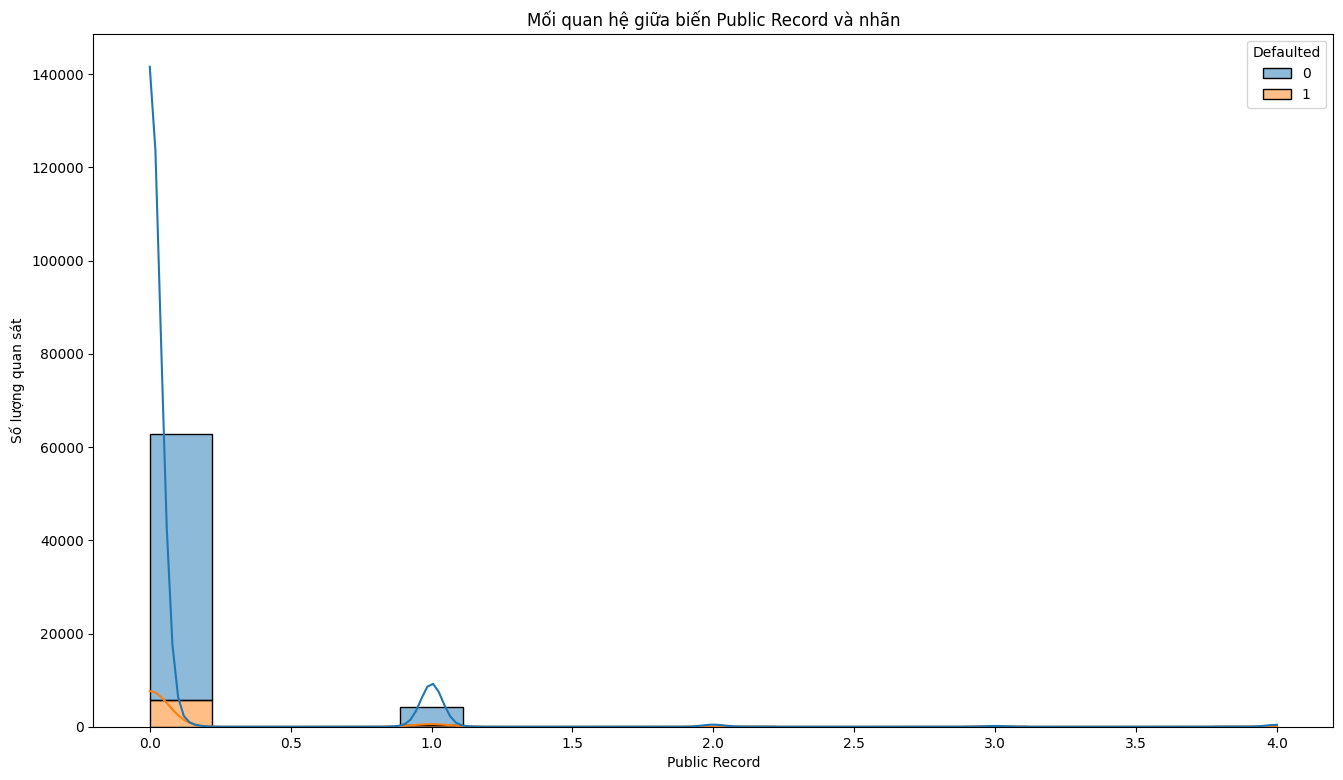

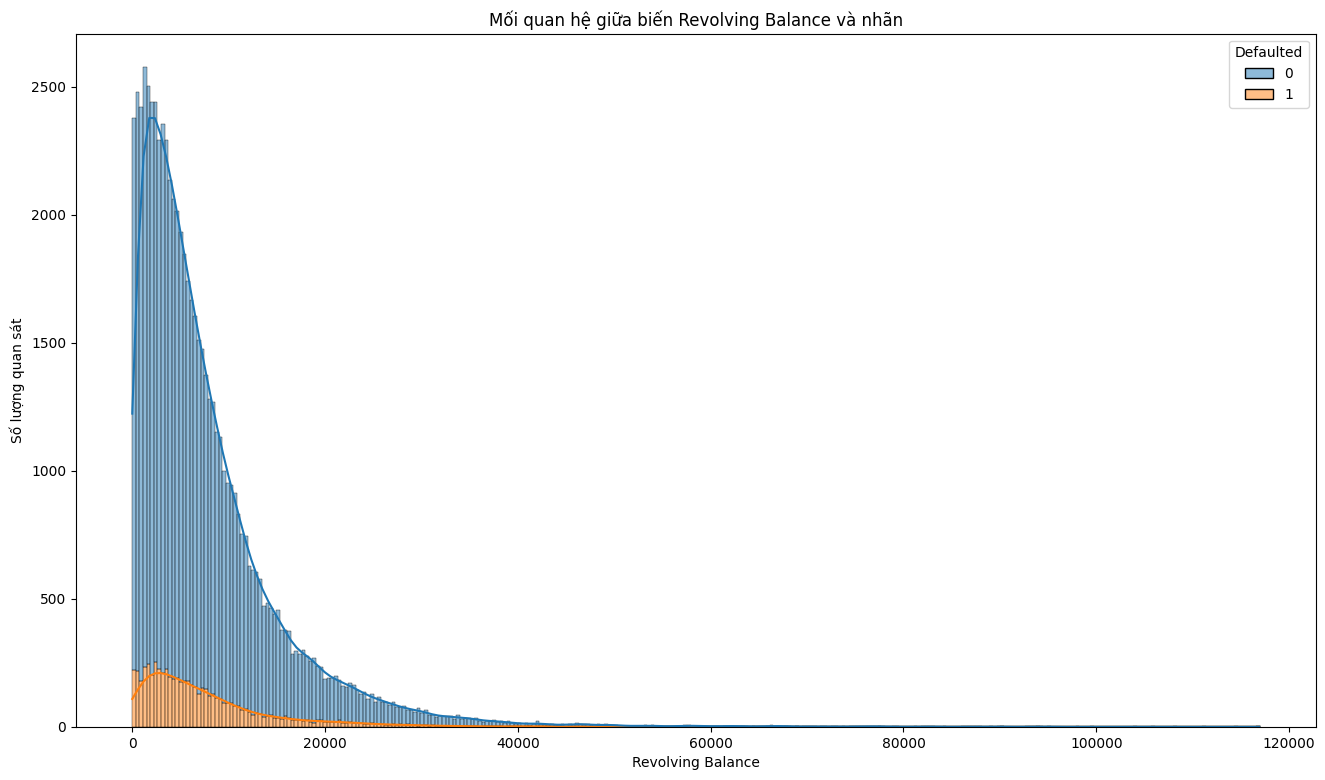

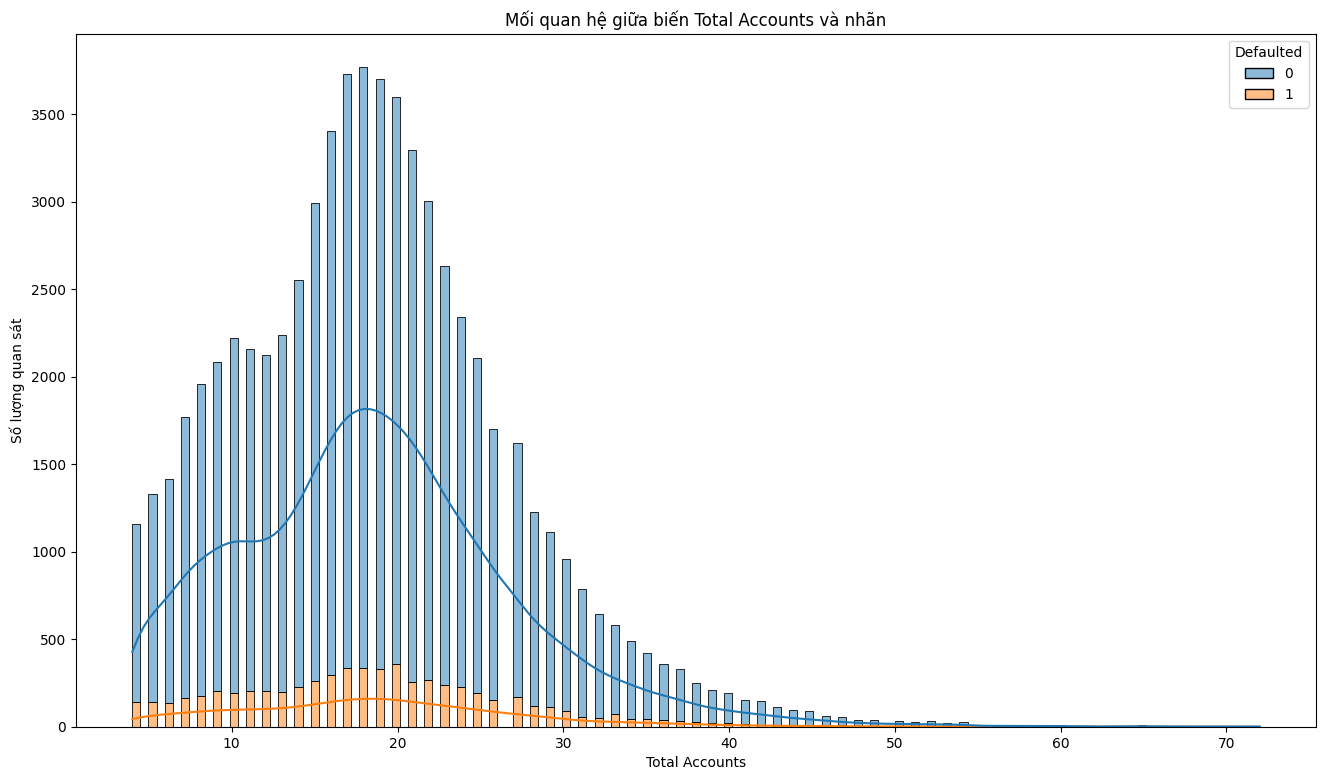

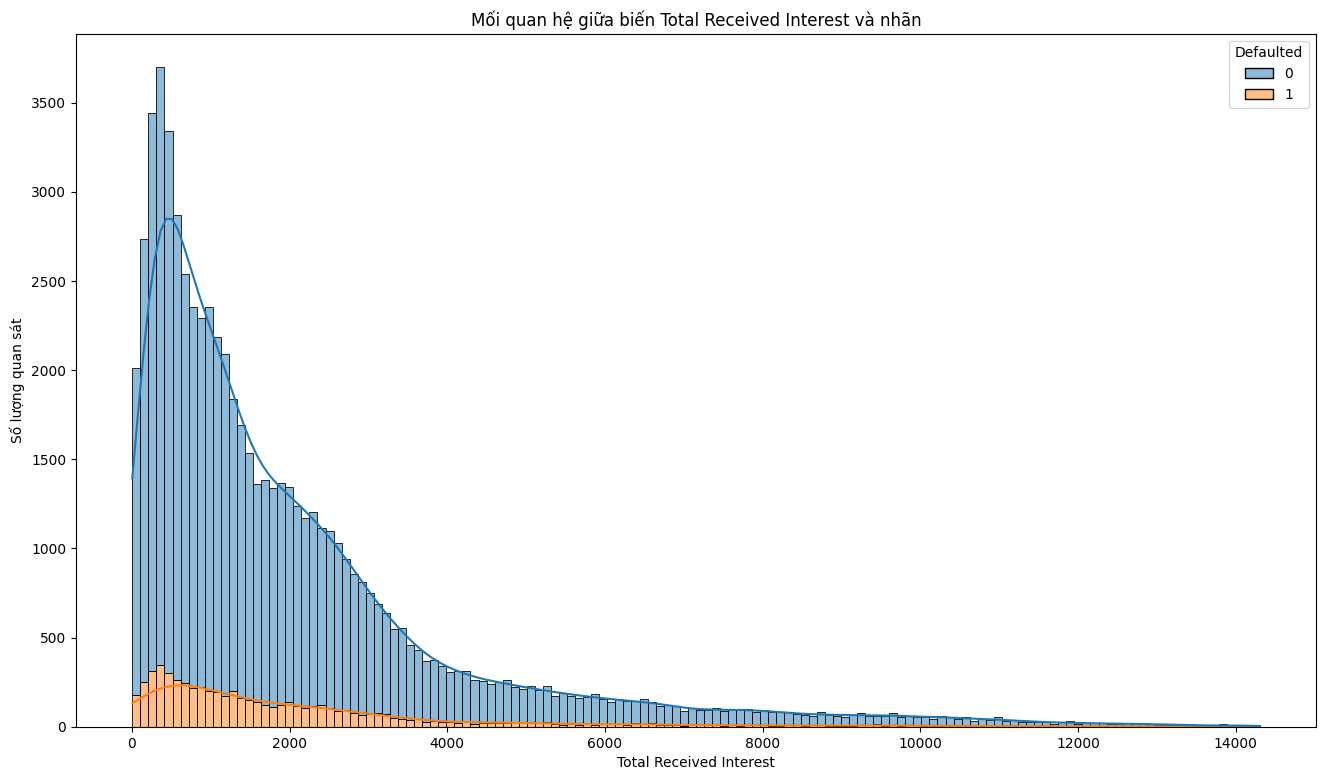

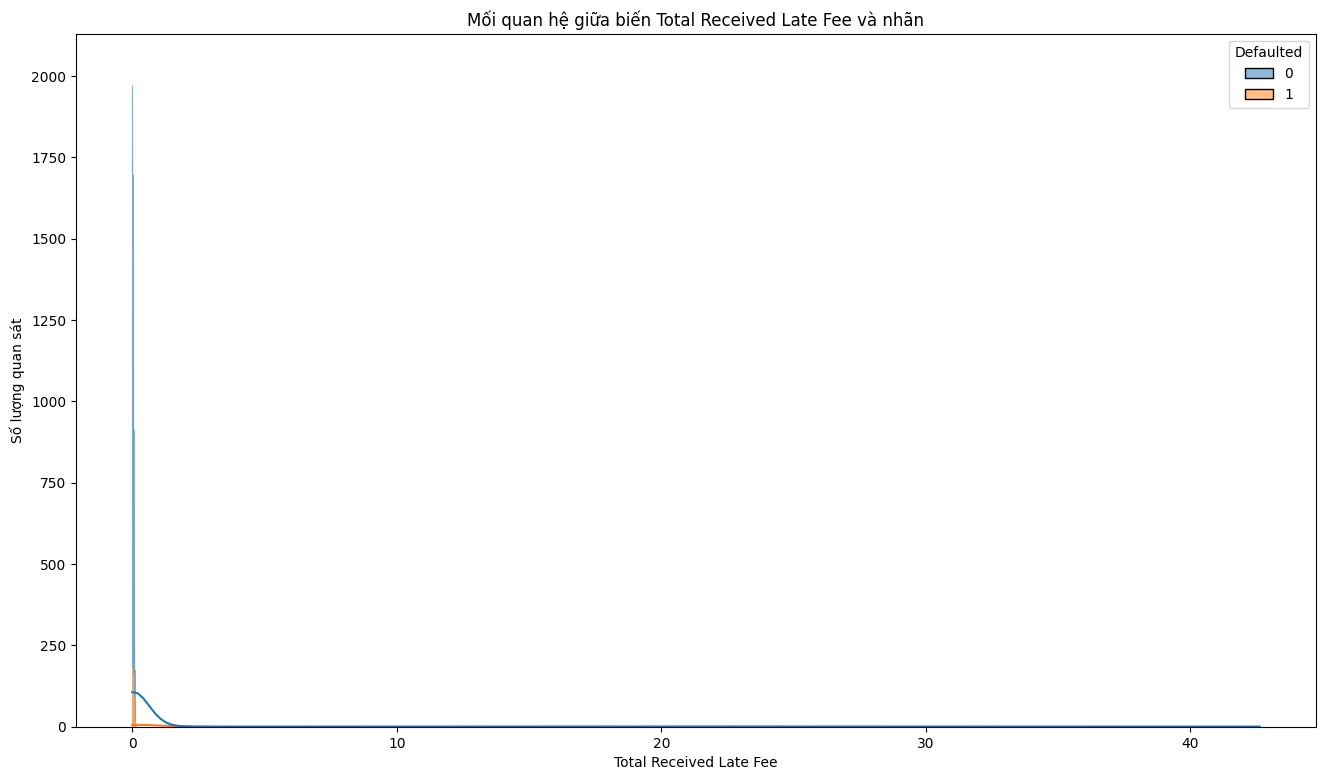

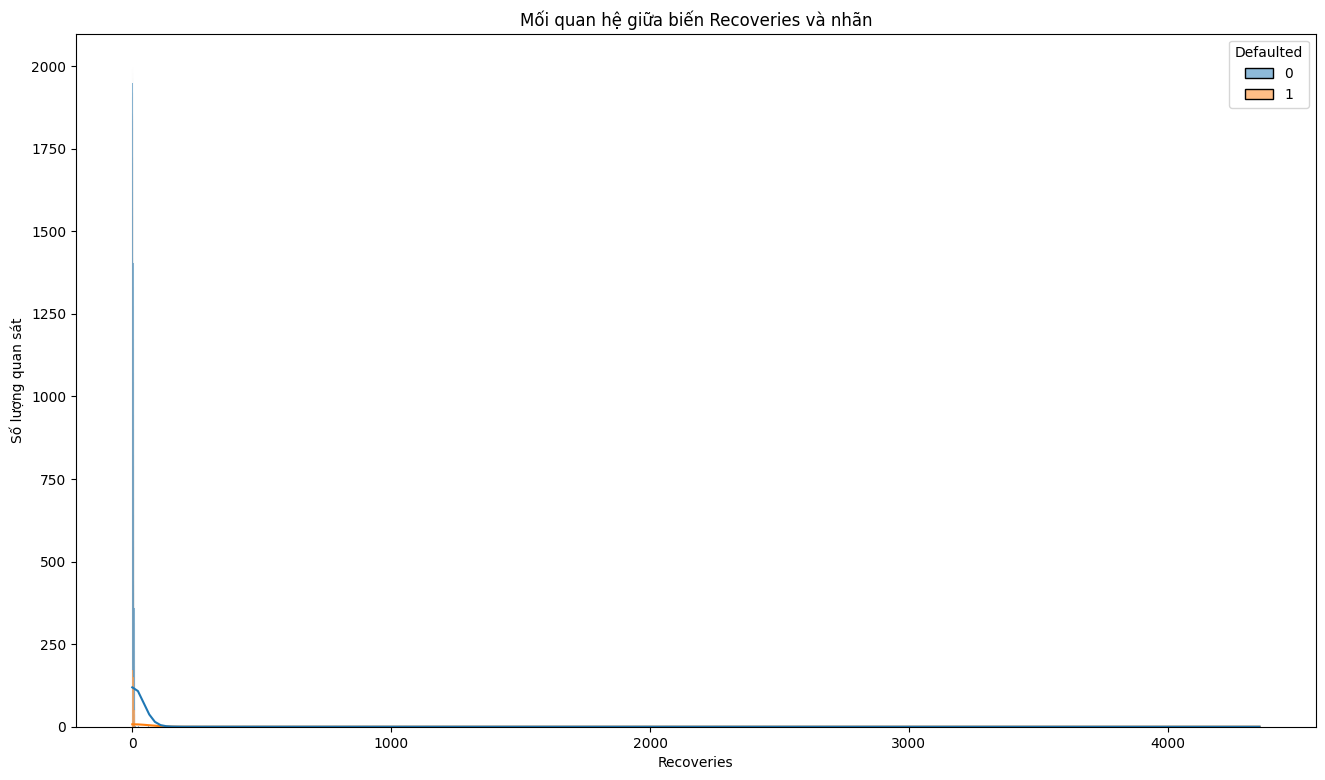

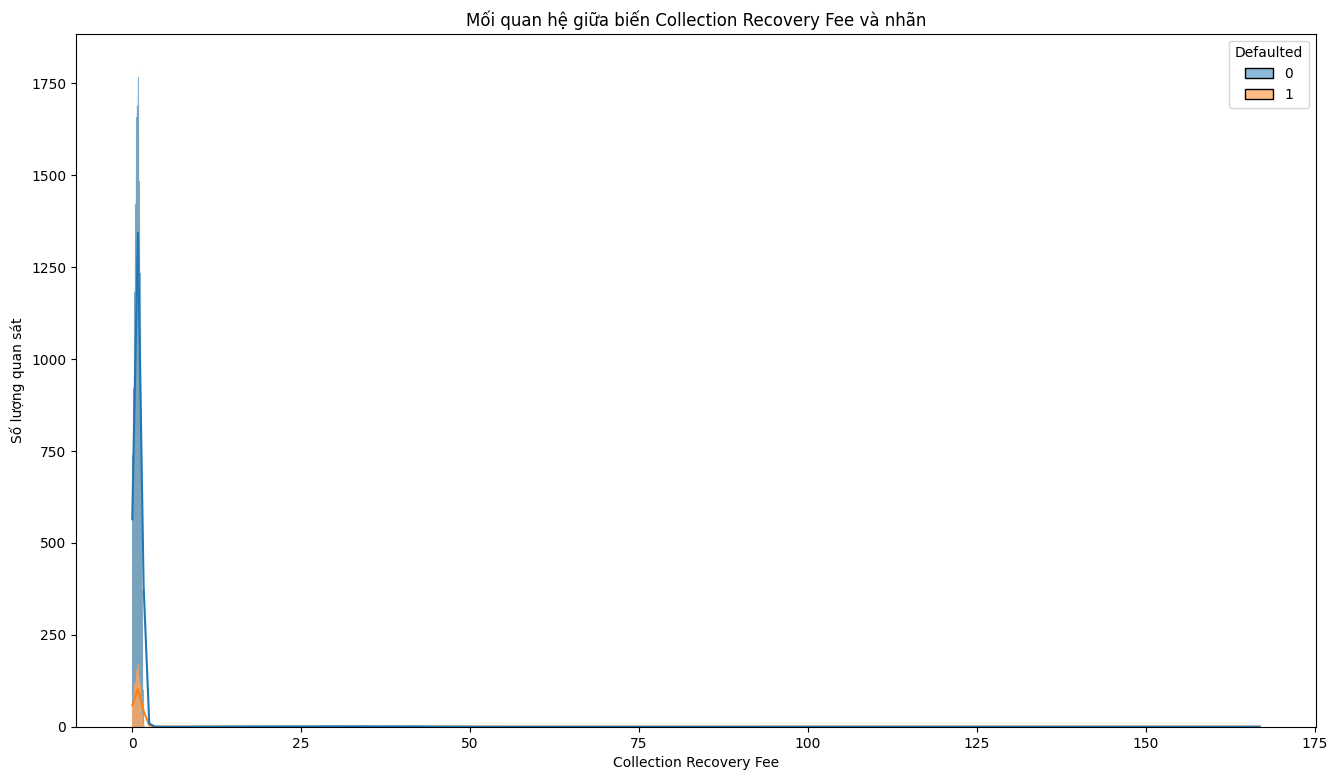

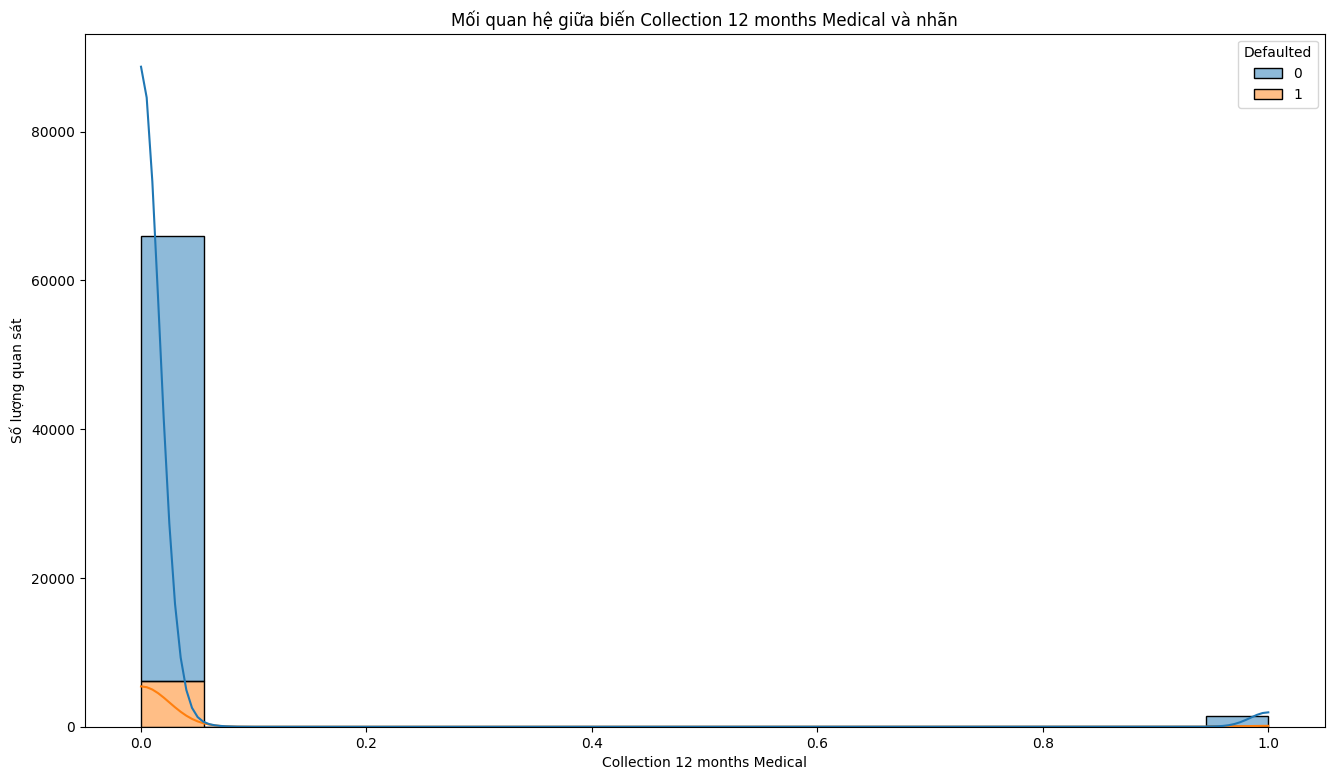

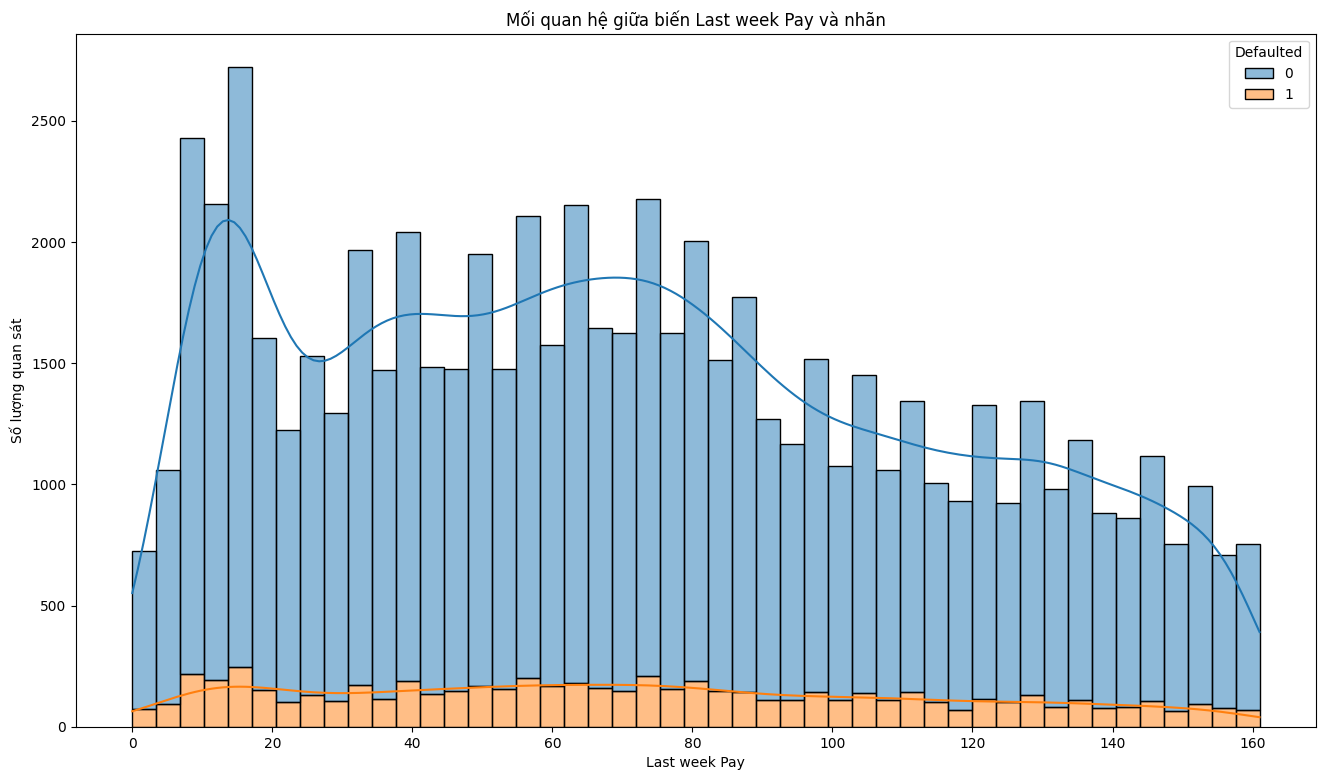

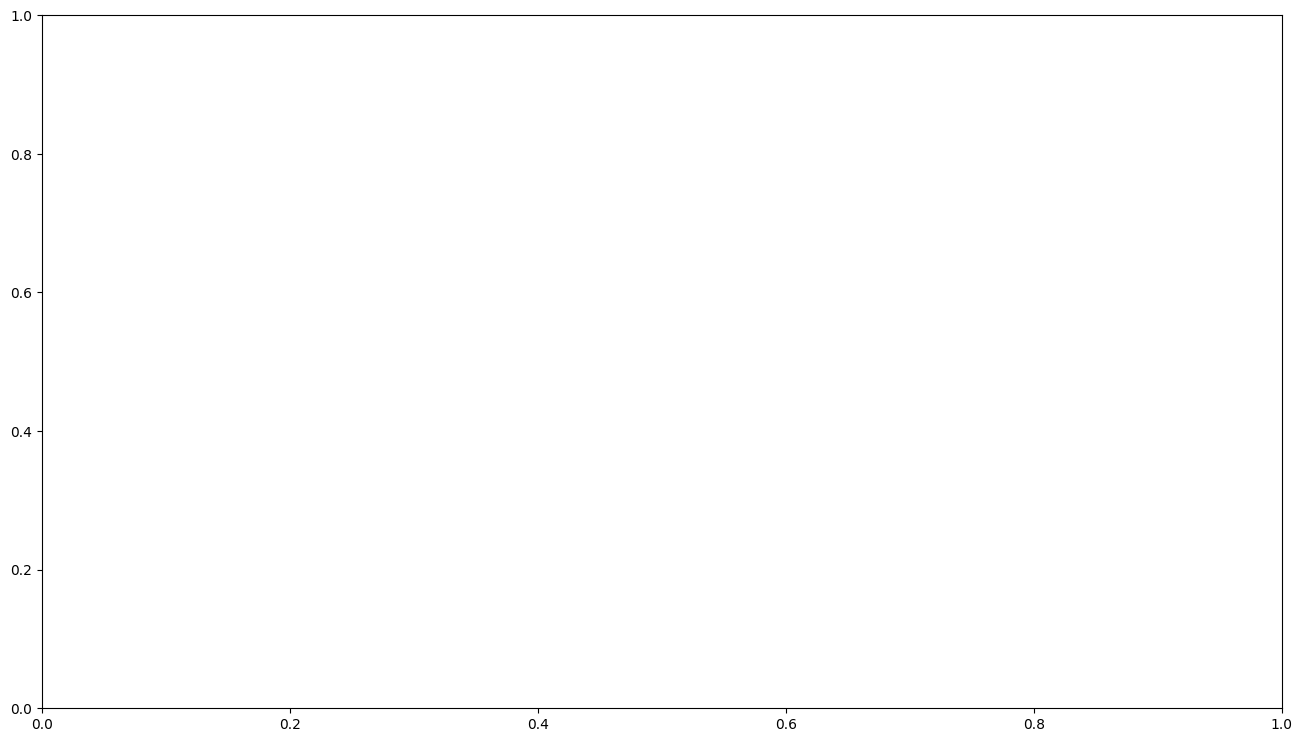

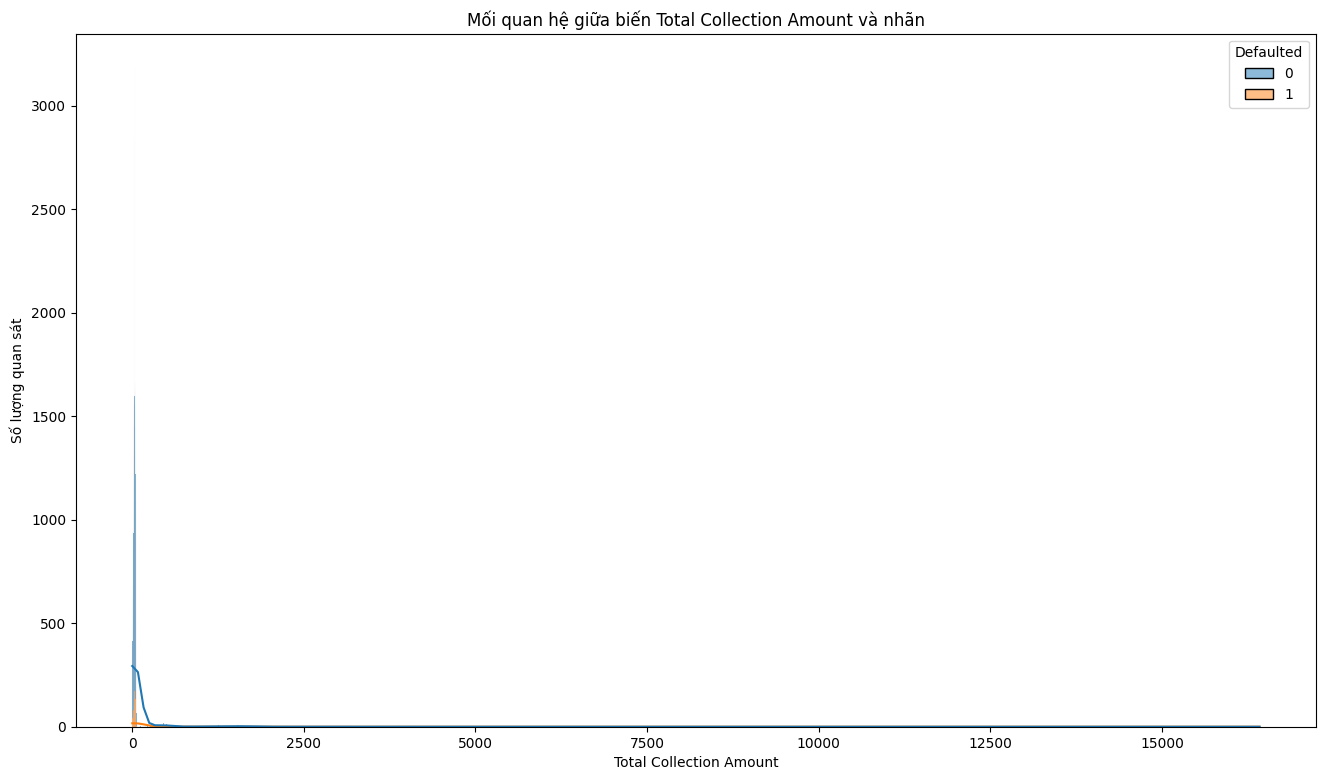

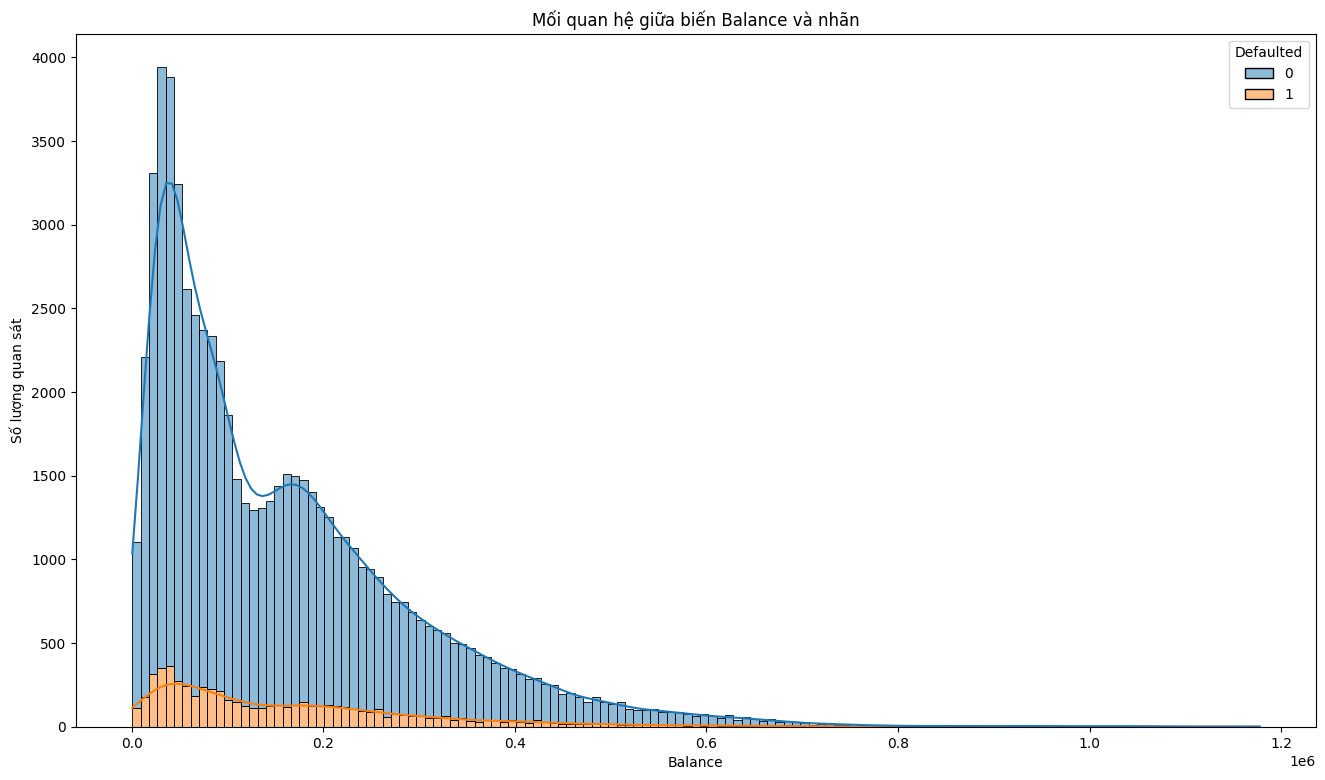

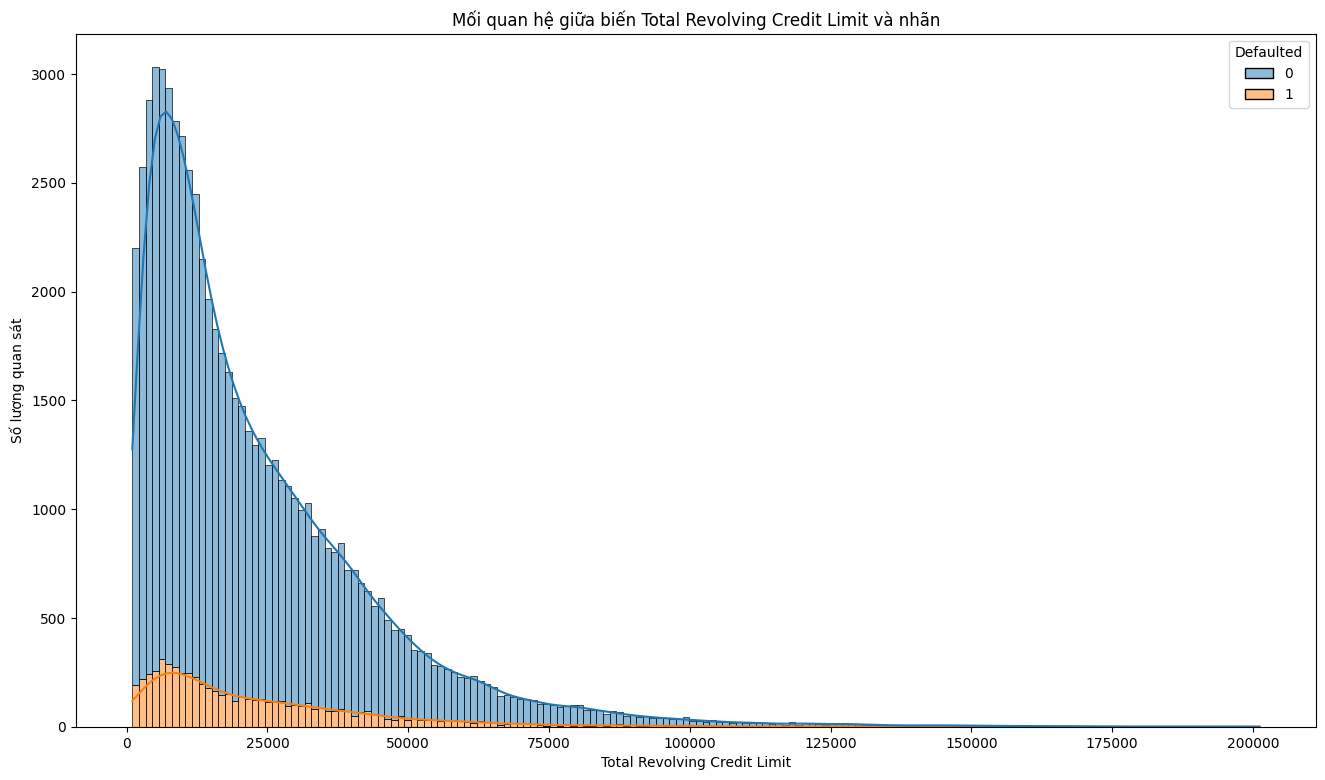

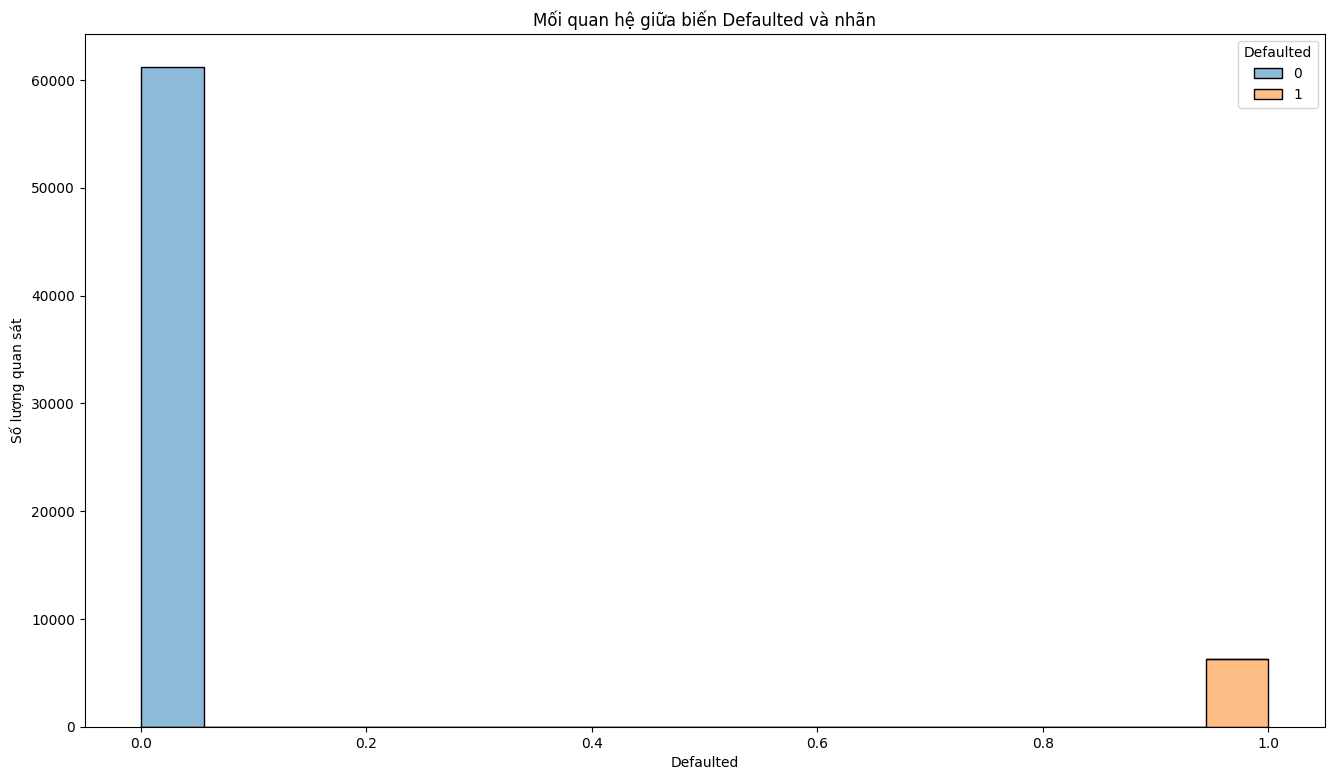

In [78]:
continuous_variables = df.select_dtypes(include=['float64', 'int64']).columns # Danh sách các biến liên tục

# Vòng lặp để vẽ biểu đồ cho mỗi biến liên tục
for variable in continuous_variables:
    fig, ax = plt.subplots(figsize=(16, 9))
    try:
        sns.histplot(data=df, x=variable, hue="Defaulted", multiple="stack", kde=True, ax=ax)
    except:
        continue
    plt.title(f"Mối quan hệ giữa biến {variable} và nhãn")
    plt.xlabel(variable)
    plt.ylabel("Số lượng quan sát")
    plt.show()

## Trực quan các dữ liệu dạng categorical

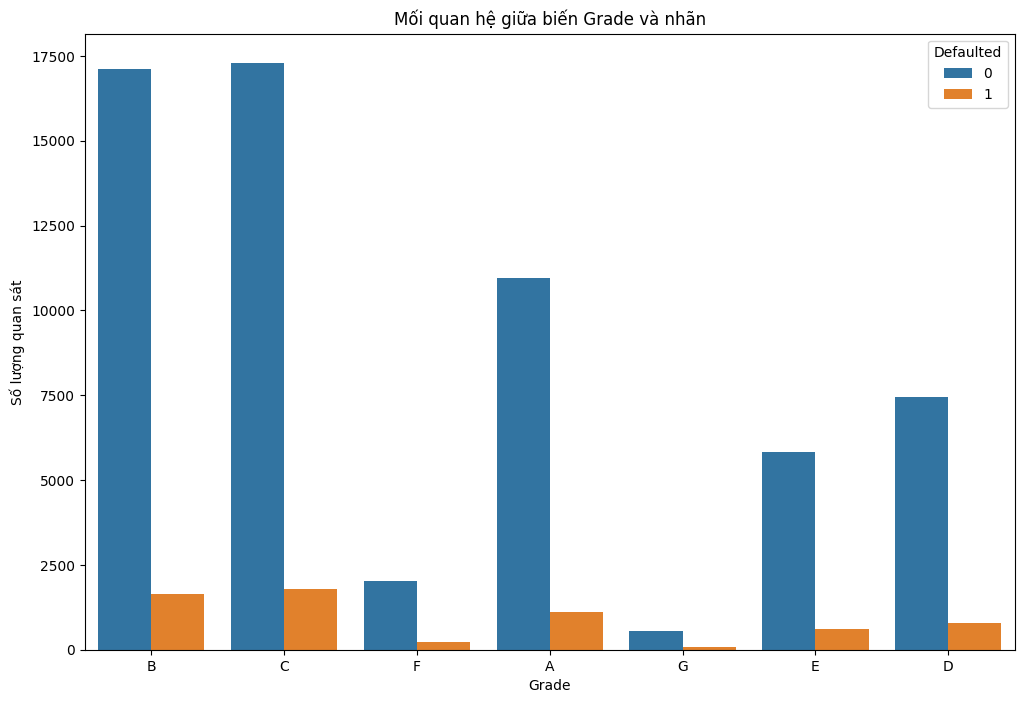

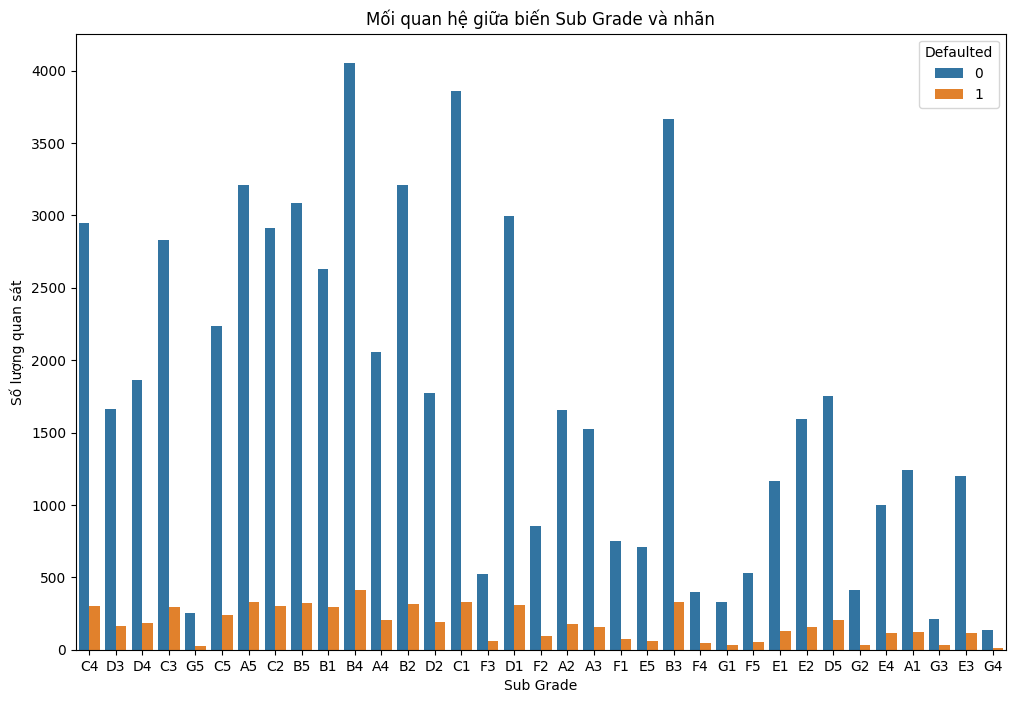

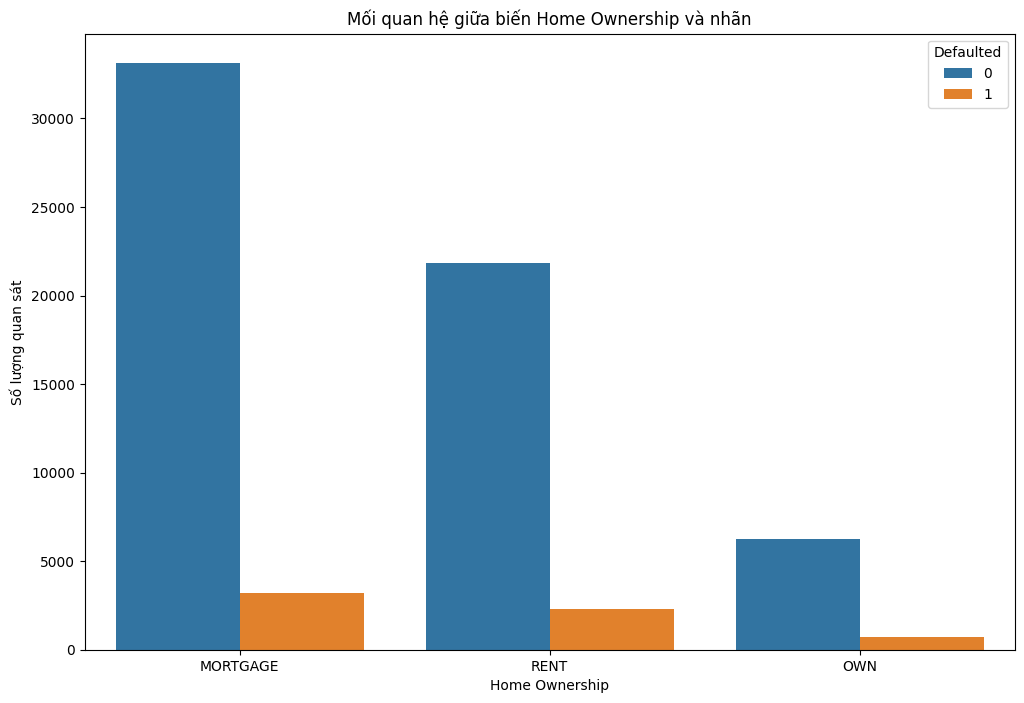

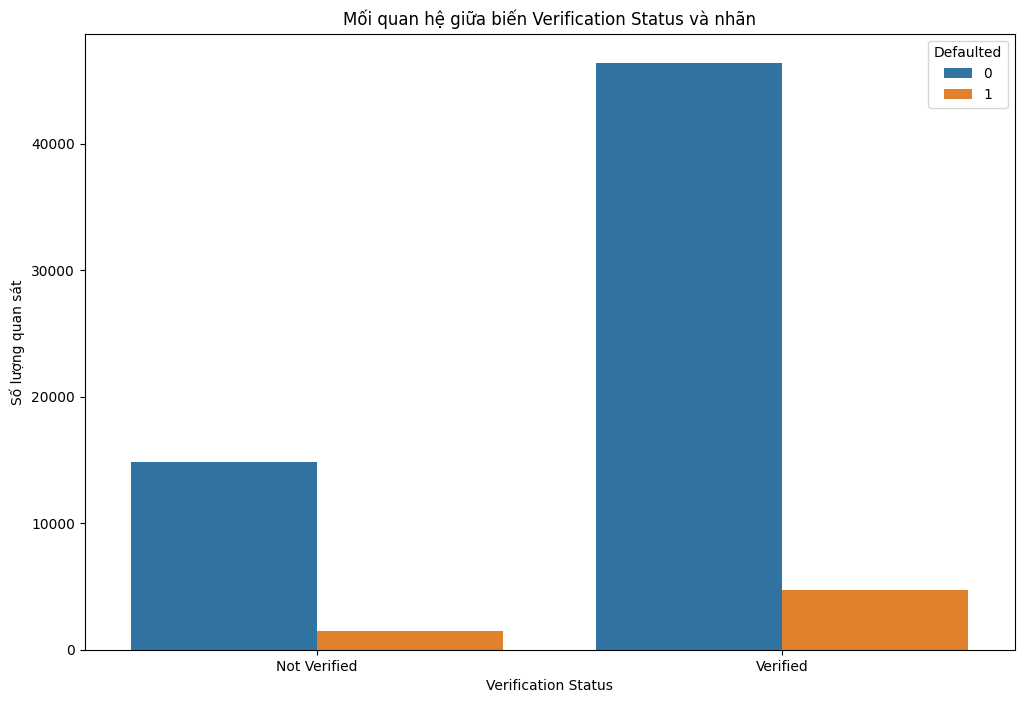

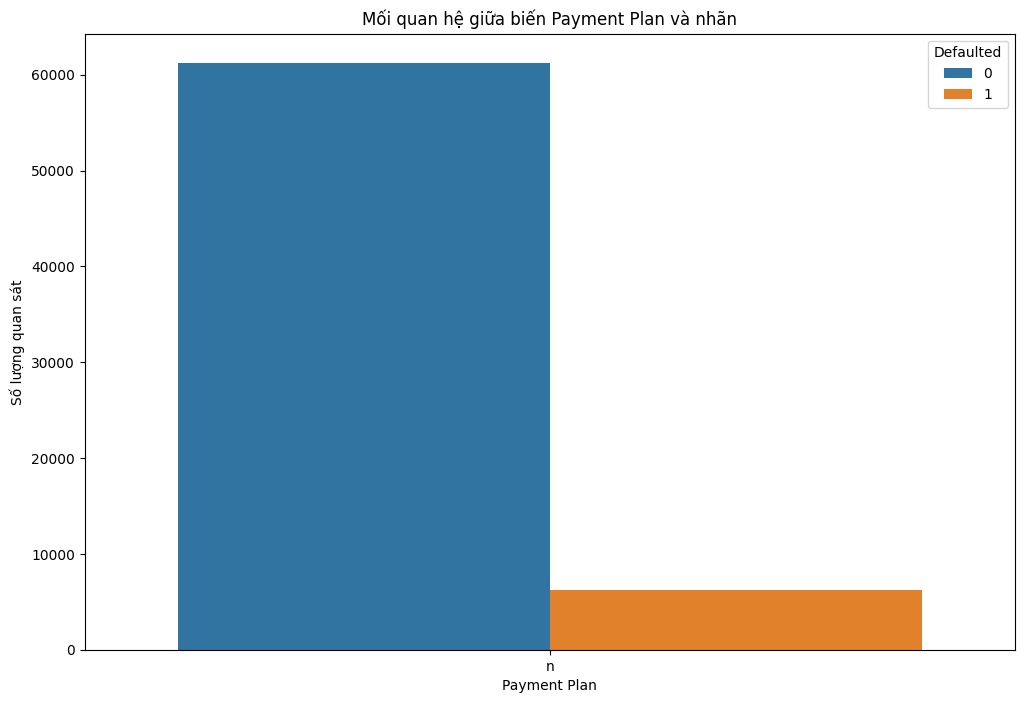

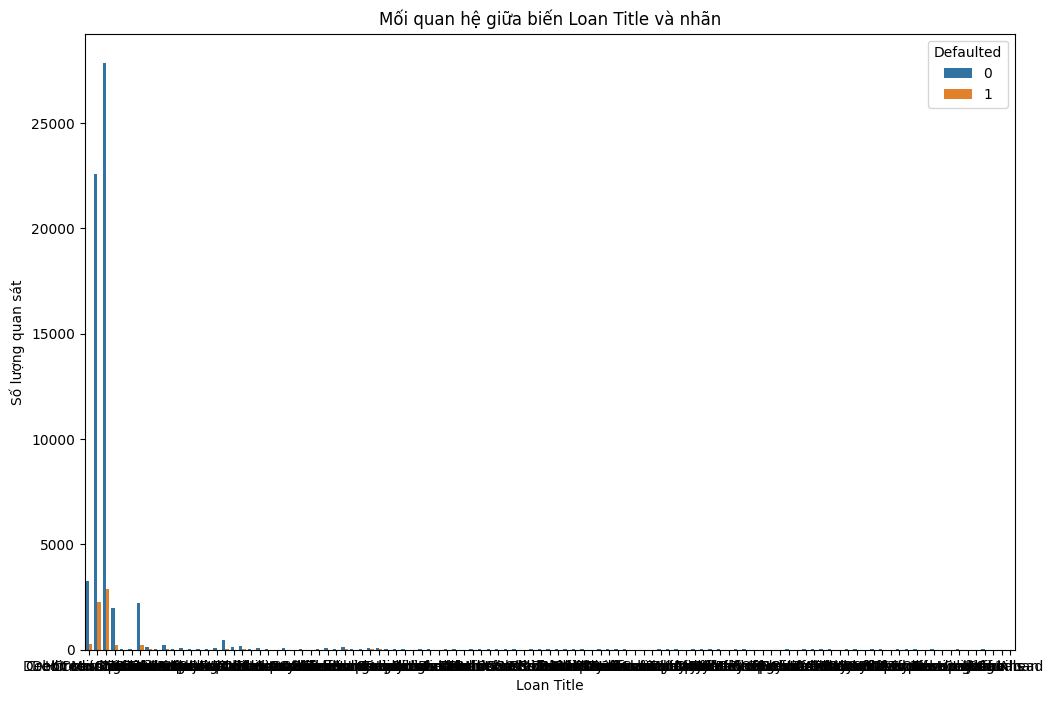

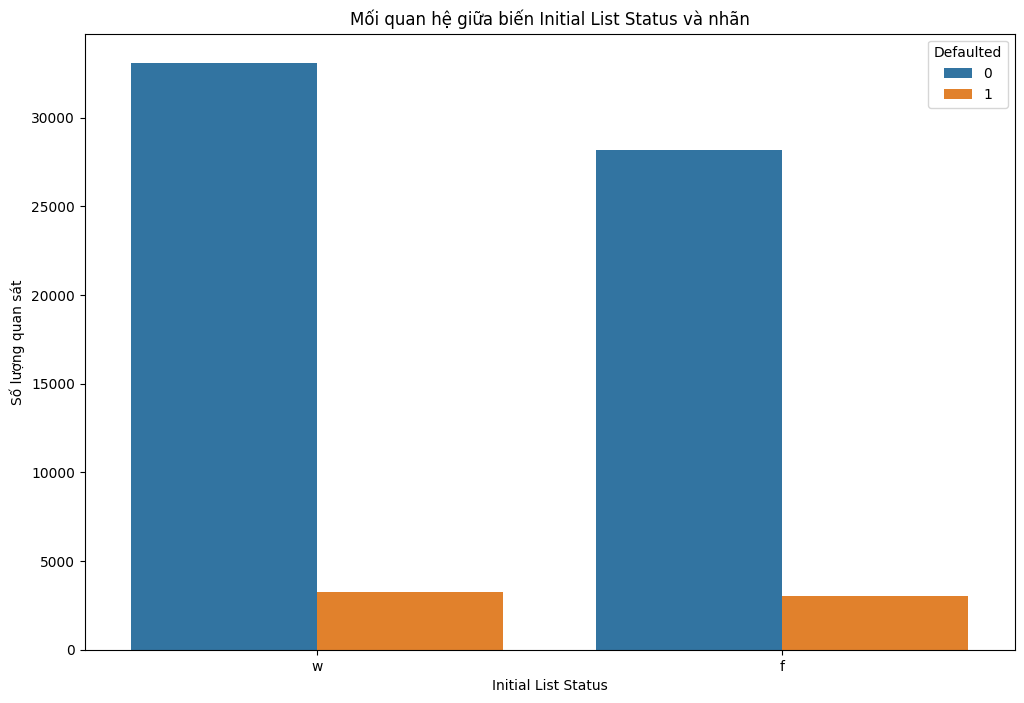

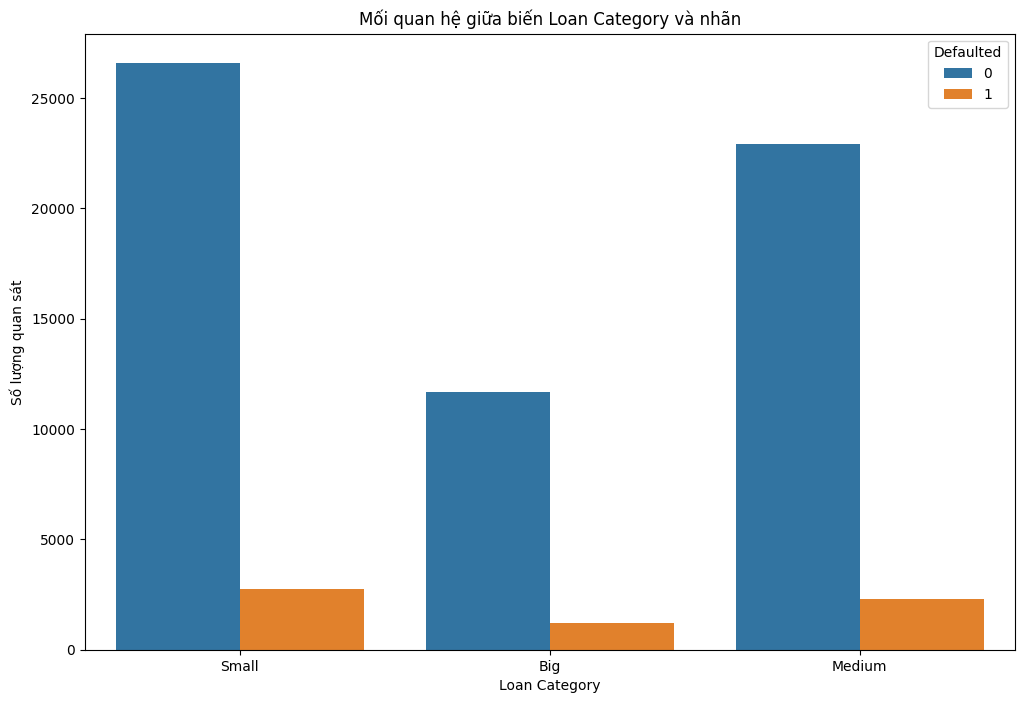

In [96]:
categorical_variables = df.select_dtypes(include=['object']).columns # Lấy danh sách các biến rời rạc

# Vòng lặp để vẽ biểu đồ cho mỗi biến rời rạc
for variable in categorical_variables:
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.countplot(data=df, x=variable, hue="Defaulted", ax=ax)
    plt.title(f"Mối quan hệ giữa biến {variable} và nhãn")
    plt.xlabel(variable)
    plt.ylabel("Số lượng quan sát")
    plt.show()

In [97]:
df.drop(['Loan Title','Payment Plan','Loan Category'],axis=1, inplace=True)

In [98]:
df.drop('Collection 12 months Medical',axis=1,inplace=True)

In [101]:
df.drop(['Inquires - six months','Revolving Balance'],axis=1,inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Home Ownership                67463 non-null  object 
 9   Salary                        67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Debit to Income               67463 non-null  float64
 12  Delinquency - two years       67463 non-null  int64  
 13  O

# Trực quan hoá dữ liệu 2


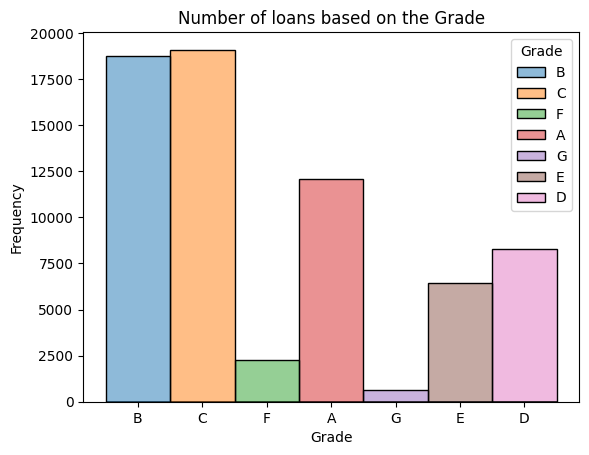

In [74]:
sns.histplot(x='Grade', hue="Grade",data=df)
plt.title("Number of loans based on the Grade")
plt.ylabel('Frequency');

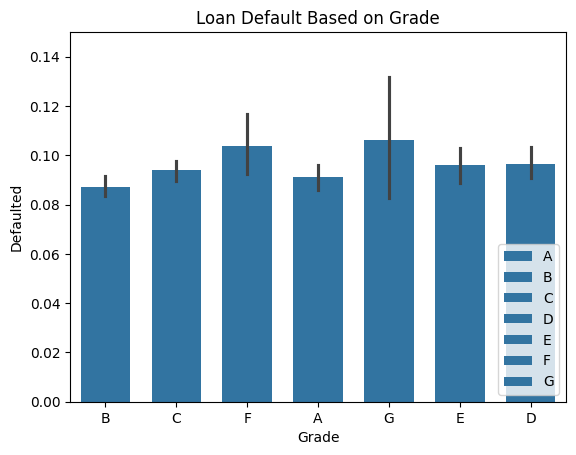

In [73]:
sns.barplot(x=df.Grade.sort_values(),y="Defaulted", data=df,width=0.7,label=df.Grade.sort_values().unique())
plt.ylim(0,0.15)
plt.title('Loan Default Based on Grade')
plt.legend(loc='lower right');

# Huấn luyện mô hình

Xoá trường "Accounts Delinquent" không có ý nghĩa trong mô hình, đồng thời phân loại các biến là liên tực hay rời rạc

In [103]:
df.drop('Accounts Delinquent', axis=1 ,inplace=True) # Xoá trường Accounts Delinquent
cate_features = [i for i in df.select_dtypes(include='object').columns] # Lấy danh sách biến rời rạc
num_features = [i for i in df.select_dtypes(exclude='object').columns] # Lấy danh sách biến liên tục

Tìm các đặc trưng chứa giá trị ngoại lai để xử lý

In [104]:
num_features = [i for i in num_features if df[i].std() > 5]  # Lọc các đặc trưng có độ lệch chuẩn của cột lớn hơn 5
cols = [i for i in cate_features if df[i].nunique()>10] # Lọc các đặc trưng có số lượng giá trị duy nhất trong cột lớn hơn 10

In [105]:
# thay thế giá trị của các đặc trưng trong DataFrame df bằng giá trị trung bình của biến phụ thuộc cho mỗi giá trị của đặc trưng đó
for feature in cols:
    print(feature)
    g = dict(df.groupby(feature)['Defaulted'].mean())
    print(g)
    df[feature] = df[feature].replace(g)

Sub Grade
{'A1': 0.09164222873900293, 'A2': 0.0979858464888405, 'A3': 0.0943620178041543, 'A4': 0.09143109540636042, 'A5': 0.0940677966101695, 'B1': 0.09986320109439124, 'B2': 0.08892045454545454, 'B3': 0.08252063015753938, 'B4': 0.09188704616763783, 'B5': 0.09565727699530517, 'C1': 0.0785577841451767, 'C2': 0.09412861136999068, 'C3': 0.09420057673822493, 'C4': 0.09353846153846154, 'C5': 0.09587378640776699, 'D1': 0.09352300242130751, 'D2': 0.097809475292919, 'D3': 0.08991228070175439, 'D4': 0.09024390243902439, 'D5': 0.10348360655737705, 'E1': 0.10092449922958398, 'E2': 0.08877434135166094, 'E3': 0.08932626797880394, 'E4': 0.10205908683974933, 'E5': 0.08062418725617686, 'F1': 0.08737864077669903, 'F2': 0.1003167898627244, 'F3': 0.0986159169550173, 'F4': 0.09977324263038549, 'F5': 0.09106529209621993, 'G1': 0.09562841530054644, 'G2': 0.08053691275167785, 'G3': 0.13008130081300814, 'G4': 0.09933774834437085, 'G5': 0.09859154929577464}


In [106]:
df = pd.get_dummies(df) #  biểu diễn one-hot encoding cho các đặc trưng rời rạc

X = df.drop('Defaulted', axis=1) # Lấy tất cả các biến trừ biến y
y = df['Defaulted'] # Lấy biến y

X = np.array(X) # Chuyển df sang numpy
y = np.array(y) # Chuyển df sang numpy

In [107]:
# Tái chọn mẫu (resampling) dữ liệu để xử lý vấn đề mất cân bằng giữa các lớp trong biến phụ thuộc
sampler = RandomOverSampler()
X_res,y_res = sampler.fit_resample(X,y)
# Chia dữ liệu đã được tái chọn mẫu thành tập huấn luyện và tập kiểm thử
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.3, random_state=0)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                67463 non-null  int64  
 1   Loan Amount                       67463 non-null  int64  
 2   Funded Amount                     67463 non-null  int64  
 3   Funded Amount Investor            67463 non-null  float64
 4   Term                              67463 non-null  int64  
 5   Interest Rate                     67463 non-null  float64
 6   Sub Grade                         67463 non-null  float64
 7   Salary                            67463 non-null  float64
 8   Debit to Income                   67463 non-null  float64
 9   Delinquency - two years           67463 non-null  int64  
 10  Open Account                      67463 non-null  int64  
 11  Public Record                     67463 non-null  int64  
 12  Tota

Tóm tắt PPL:

+ Logistic Regression: Sử dụng hàm sigmoid để chuyển đổi đầu ra thành xác suất và áp dụng nguyên tắc tối ưu hóa entropy chéo.

+ K-Nearest Neighbors: Dự đoán lớp của một điểm dữ liệu mới dựa trên đa số lớp của các điểm láng giềng (K điểm gần nhất).

+ Support Vector Machine (SVM): Xây dựng siêu phẳng tối ưu để tối đa hóa khoảng cách giữa các lớp, sử dụng hàm kernel cho dữ liệu không tuyến tính.

+ Random Forest: Xây dựng nhiều cây quyết định (decision trees) ngẫu nhiên và kết hợp dự đoán của chúng để giảm overfitting và tăng tính đa dạng của mô hình.

In [109]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_preds = logreg_model.predict(X_test)

In [110]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [111]:
# Naive Bayes
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)
naive_bayes_preds = naive_bayes_model.predict(X_test)

In [112]:
# Lưu mô hình Logistic Regression
joblib.dump(logreg_model, 'logreg_model.pkl')

# Tải lại mô hình
loaded_logreg_model = joblib.load('logreg_model.pkl')

In [113]:
# Lưu mô hình KNN
joblib.dump(knn_model, 'knn_model.pkl')

# Tải lại mô hình
loaded_knn_model = joblib.load('knn_model.pkl')

In [114]:
# Lưu mô hình Naive Bayes
joblib.dump(naive_bayes_model, 'naive_bayes_model.pkl')

# Tải lại mô hình
naive_bayes_model = joblib.load('naive_bayes_model.pkl')

In [115]:
# Đánh giá mô hình
models = ['Logistic Regression', 'KNN', 'Naive Bayes']
results = []

for idx, preds in enumerate([logreg_preds, knn_preds, naive_bayes_preds]): # lazy_preds
    accuracy = accuracy_score(y_test, preds)
    roc_score = roc_auc_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    results.append({
        'Model': models[idx],
        'Accuracy': accuracy,
        'ROC Score': roc_score,
        'F1 Score': f1
    })

# Hiển thị kết quả
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,ROC Score,F1 Score
0,Logistic Regression,0.504437,0.504252,0.549941
1,KNN,0.828470,0.828183,0.851668
2,Naive Bayes,0.500354,0.501089,0.172722


## Kết luận:

Trong bài này ta đã thực hiện thu thập và phân tích dữ liệu. Sau đó, ta đã xử lý các dữ liệu để đưa dữ liệu vào các mô hình máy học huấn luyện: Logistic regression, knn và Naive Baye. Kết quả cho thấy KNN có kết quả đáng tin cậy nhất.

# Thực nghiệm với kỹ thuật Streaming


==> incremental learning: mô hình được đào tạo dần dần trên từng phần nhỏ của dữ liệu thay vì trên toàn bộ tập dữ liệu một lần

In [ ]:
# Đọc dữ liệu theo từng chunk
chunk_size = 1000  # Số lượng dòng mỗi chunk
file_path = 'data/data.csv'
reader = pd.read_csv(file_path, chunksize=chunk_size)

# Khởi tạo các biến để chứa kết quả cuối cùng
X_final, y_final = None, None

# Xử lý từng chunk
for chunk in reader:
    # Xoá trường 'Accounts Delinquent'
    chunk.drop('Accounts Delinquent', axis=1, inplace=True)

    # Lấy danh sách biến rời rạc
    cate_features = [i for i in chunk.select_dtypes(include='object').columns]

    # Lấy danh sách biến liên tục
    num_features = [i for i in chunk.select_dtypes(exclude='object').columns]

    # Biểu diễn one-hot encoding cho các đặc trưng rời rạc
    chunk = pd.get_dummies(chunk)

    # Lấy tất cả các biến trừ biến y
    X_chunk = chunk.drop('Loan Status', 1)

    # Lấy biến y
    y_chunk = chunk['Loan Status']

    # Chuyển chunk sang numpy
    X_chunk = np.array(X_chunk)
    y_chunk = np.array(y_chunk)

    # Tái chọn mẫu (resampling) dữ liệu để xử lý vấn đề mất cân bằng giữa các lớp trong biến phụ thuộc
    sampler = RandomOverSampler()
    X_res, y_res = sampler.fit_resample(X_chunk, y_chunk)

    # Chia dữ liệu đã được tái chọn mẫu thành tập huấn luyện và tập kiểm thử
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

    # Logistic Regression
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)
    logreg_preds = logreg_model.predict(X_test)

    # KNN
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    knn_preds = knn_model.predict(X_test)

    # Naive Bayes
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(X_train, y_train)
    naive_bayes_preds = naive_bayes_model.predict(X_test)

    # Đánh giá mô hình
    models = ['Logistic Regression', 'KNN', 'Naive Bayes']
    results = []

    for idx, preds in enumerate([logreg_preds, knn_preds, naive_bayes_preds]):
        accuracy = accuracy_score(y_test, preds)
        roc_score = roc_auc_score(y_test, preds)
        f1 = f1_score(y_test, preds)

        results.append({
            'Model': models[idx],
            'Accuracy': accuracy,
            'ROC Score': roc_score,
            'F1 Score': f1
        })

# Hiển thị kết quả cuối cùng
results_df = pd.DataFrame(results)

In [ ]:
results_df

,Model,Accuracy,ROC Score,F1 Score
0,Logistic Regression,0.591603,0.592149,0.602230
1,KNN,0.874046,0.875940,0.886598
2,Naive Bayes,0.606870,0.603340,0.482412
